In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

userId MovieLens用户被随机选中列入。 他们的ID已被匿名。 用户id在ratings.csv和tags.csv之间是一致的（即，同一个id是指两个文件中的同一个用户）。

movieId 数据集中只包含具有至少一个评分或标签的电影。 这些电影id与MovieLens网站上的一致（例如，id 1对应于URL https://movielens.org/movies/1 ） ratings.csv ， tags.csv ， movies.csv和links.csv （即同一个id在这四个数据文件中指同一个电影）之间的movieId是一致的。

ratings.csv 所有评级都包含在文件ratings.csv ,标题行之后的此文件的每一行表示一个用户对一个电影的评级，并具有以下格式： userId,movieId,rating,timestamp 该文件中的行首先由userId排序，然后在用户内由movieId排序。 评分以五星级为单位，半星级为增量（0.5星 - 5.0星）。 时间戳表示自1970年1月1日午夜协调世界时（UTC）以来的秒数。

tags.csv 所有的标签都包含在文件tags.csv ,标题行之后的这个文件的每行表示一个用户应用于一个电影的一个标记，并具有以下格式： userId,movieId,tag,timestamp 该文件中的行首先由userId排序，然后在用户内由movieId排序。 标签是关于电影的用户生成的元数据。 每个标签通常是一个单词或短语。 每个用户确定一个特定标签的含义，价值和用途。 时间戳表示自1970年1月1日午夜协调世界时（UTC）以来的秒数。

movies.csv 电影信息包含在movies.csv文件中。 标题行之后的每个文件行代表一个电影，并具有以下格式： movieId,title,genres 电影标题是从https://www.themoviedb.org/ 手动输入或导入的，并将发行年份包括在括号内。 这些标题可能存在错误和不一致之处。

links.csv 可用于链接到其他电影数据源的标识符包含在文件links.csv 。 标题行之后的每个文件行代表一个电影，并具有以下格式： movieId,imdbId,tmdbId movieId是https://movielens.org 使用的电影标识符,例如，电影“玩具总动员”有链接https://movielens.org/movies/1 imdbId是http://www.imdb.com 使用的电影的标识符,例如，电影“玩具总动员”有链接http://www.imdb.com/title/tt0114709/ tmdbId是https://www.themoviedb.org 使用的电影的标识符,例如，电影“玩具总动员”的链接https://www.themoviedb.org/movie/862 使用上面列出的资源受每个提供商的条款约束。

genome-scores.csv和genome-tags.csv 该数据集包括标签基因组的当前副本。 标签基因组是包含电影的标签相关性分数的数据结构。 结构是一个密集的矩阵：基因组中的每部电影对基因组中的每个标签都有价值。 如本文所述，标签基因组编码电影表现出由标签（大气，发人深省，逼真等）表示的特定属性的强烈程度。 标签基因组是使用机器学习算法在包括标签，评级和文本评论的用户贡献内容上计算的。 文件genome-scores.csv包含以下格式的电影标签相关性数据： movieId,tagId,relevance 第二个文件genome-tags.csv提供基因组文件中标记ID的标记描述，格式如下： tagId,tag 数据集导出时会生成tagId值，因此MovieLens数据集的版本可能会有所不同

In [2]:
path = './ml-latest/ml-latest'
genome_scores = pd.read_csv(path + '/genome-scores.csv')
links = pd.read_csv(path + '/links.csv')
ratings = pd.read_csv(path + '/ratings.csv')
tags = pd.read_csv(path + '/tags.csv')
genome_tags = pd.read_csv(path + '/genome-tags.csv')
movies = pd.read_csv(path + '/movies.csv')

In [3]:
tags['timestamp'] = pd.to_datetime(tags['timestamp'], format='%Y-%m-%d %H:%M:%S')
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], format='%Y-%m-%d %H:%M:%S')

In [5]:
files = ['links','ratings','tags','movies','genome-scores','genome-tags']
for file in files:
    path = './ml-latest/ml-latest/' + file + '.csv'
    file = pd.read_csv(path)
    print(file.shape,file.dtypes)

(45843, 3) movieId      int64
imdbId       int64
tmdbId     float64
dtype: object
(26024289, 4) userId         int64
movieId        int64
rating       float64
timestamp      int64
dtype: object
(753170, 4) userId        int64
movieId       int64
tag          object
timestamp     int64
dtype: object
(45843, 3) movieId     int64
title      object
genres     object
dtype: object
(12400104, 3) movieId        int64
tagId          int64
relevance    float64
dtype: object
(1128, 2) tagId     int64
tag      object
dtype: object


In [11]:
from collections import Counter
import json
tags.tag = tags.tag.astype('str')
tags_list = tags['tag'].tolist()
tag_count = Counter(tags_list)
tag_count_10 = tag_count.most_common(10)
tag_10_dict = dict(tag_count_10)
tag_dict = dict(tag_count)
tag_dict
with open('tag.json','a') as outfile:
    json.dump(tag_dict,outfile,ensure_ascii=False)
    outfile.write('\n')

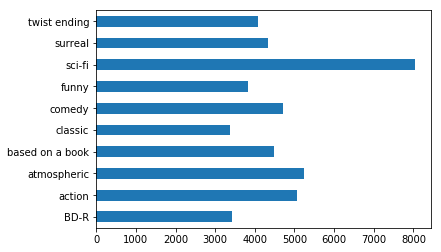

In [13]:
df = pd.DataFrame(tag_10_dict, index=[0])
df_row = df.iloc[-1]
df_row.plot(kind='barh')

In [17]:
path = './ml-latest/ml-latest'
merge_tag = tags.groupby(['userId','movieId'])['tag'].agg(lambda x:':'.join(x)).reset_index()
merge_tag.to_csv(path + '/merge_tag.csv',index = None)

In [18]:
genres_set = set()
for val in movies['genres'].str.split('|'):
    genres_set.update(val)
genres_set.add('<null>')
genres2int = {val:ii for ii, val in enumerate(genres_set)}
with open('genres.json','a') as outfile:
    json.dump(genres2int,outfile,ensure_ascii=False)
    outfile.write('\n')

In [21]:
movies_show = pd.concat([movies, movies.genres.str.get_dummies(sep='|')], axis=1)
del movies_show['genres']
movies_show.loc['total'] = movies_show.sum(numeric_only=True)
movies_show.iloc[-1, movies_show.columns.get_loc('movieId')] = " "
movies_show.tail()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
45839,176271,Century of Birthing (2011),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45840,176273,Betrayal (2003),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45841,176275,Satan Triumphant (1917),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45842,176279,Queerama (2017),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
total,,NaN,2756.0,5775.0,3369.0,1942.0,2182.0,13002.0,4247.0,4122.0,...,360.0,4448.0,197.0,1079.0,2274.0,6069.0,2847.0,6761.0,1544.0,1028.0


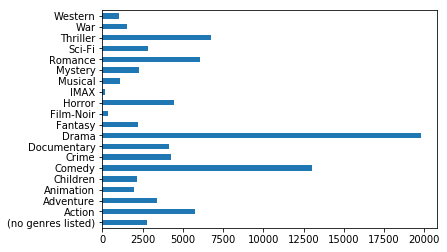

In [23]:
count_type = movies_show.iloc[-1]
count_type = count_type.drop(['movieId', 'title'])
count_type.to_csv('count_type.csv', sep=',', header=True, index=True)
count_type.plot(kind='barh')

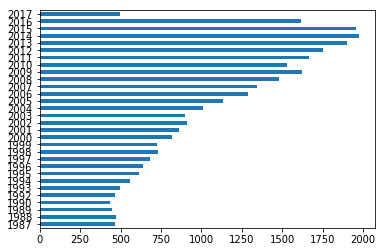

In [25]:
import re

year_list = []
for row in movies['title']:
    x = re.search(r"\(\d{4}\)", row)
    if x:
        y = x.group(0)
    year_list.append(y[1:-1])

year_count = Counter(year_list)
year_count_30 = year_count.most_common(30)
year_dict = dict(year_count_30)
year_df = pd.DataFrame(year_dict, index=[0])
year_df.iloc[-1].plot(kind='barh')

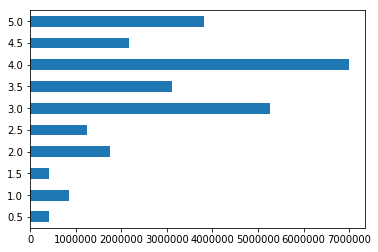

In [27]:
ratings_list = ratings.rating.tolist()
ratings_count = Counter(ratings_list)
ratings_dict = dict(ratings_count)
ratings_count_df = pd.DataFrame(ratings_dict, index=[0])

ratings_count_df.iloc[-1].plot(kind='barh')

In [30]:
movie_data = pd.merge(movies, ratings,on = ['movieId'], how = 'left')
movie_data['count'] = 1
movie_title = movie_data.groupby(['title'])[['count']].sum().reset_index()
title_t = movie_data[['movieId','title']]
movie_title = pd.merge(movie_title,title_t,on = ['title'],how = 'left')
movie_title = movie_title.drop_duplicates()
movie_title.to_csv('movie_ratingCount.csv',index = None)

In [32]:
genome = pd.merge(genome_scores,genome_tags,on = ['tagId'],how = 'left')
genome = genome.drop('tagId',axis = 1)
genome.to_csv('genome.csv',index = None)

In [35]:
movie_rating = pd.merge(ratings,movies,on = ['movieId'],how = 'left')
title_rating = pd.DataFrame(movie_rating.groupby('title')['rating'].mean())
title_rating['count_ratings'] = movie_rating.groupby('title')['rating'].count()
title_rating.columns = ['mean_rating','count_rating']
title_rating.to_csv('title_rating.csv')
movie_rating.to_csv('movie_rating.csv',index = None)

In [3]:
rating_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].mean())
rating_by_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())
count_by_user = pd.DataFrame(ratings.groupby('userId')['rating'].count())
count_by_movie = pd.DataFrame(ratings.groupby('movieId')['rating'].count())
rating_by_user = rating_by_user.reset_index()
rating_by_movie = rating_by_movie.reset_index()
count_by_user = count_by_user.reset_index()
count_by_movie = count_by_movie.reset_index()
count_by_user.columns = ['userId','count_rating_user']
count_by_movie.columns = ['movieId','count_rating_movie']
rating_by_user.columns = ['userId','average_rating_user']
rating_by_movie.columns = ['movieId','average_rating_movie']
df_rating = pd.merge(ratings, count_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, count_by_movie, how='left', on='movieId')
df_rating = pd.merge(df_rating, rating_by_user, how='left', on='userId')
df_rating = pd.merge(df_rating, rating_by_movie, how='left', on='movieId')
df_rating

,userId,movieId,rating,timestamp,count_rating_user,count_rating_movie,average_rating_user,average_rating_movie
0,1,110,1.0,1425941529,27,66512,4.277778,4.016057
1,1,147,4.5,1425942435,27,4967,4.277778,3.595933
2,1,858,5.0,1425941523,27,57070,4.277778,4.339811
3,1,1221,5.0,1425941546,27,36679,4.277778,4.263475
4,1,1246,5.0,1425941556,27,25752,4.277778,3.912803
5,1,1968,4.0,1425942148,27,26611,4.277778,3.827553
6,1,2762,4.5,1425941300,27,49643,4.277778,4.021282
7,1,2918,5.0,1425941593,27,27822,4.277778,3.926928
8,1,2959,4.0,1425941601,27,60024,4.277778,4.230716
9,1,4226,4.0,1425942228,27,40706,4.277778,4.157078


In [26]:
df_rating.to_csv('rating_user&movie.csv',index = None)

In [3]:
df_rating = pd.read_csv('rating_user&movie.csv')

In [4]:
rating_subset = df_rating[(df_rating.count_rating_user >= 150) & (df_rating.count_rating_movie >= 5000)]

In [5]:
rating_subset.shape,len(rating_subset.userId.unique()), len(rating_subset.movieId.unique())

((10959949, 8), 44024, 1270)

In [6]:
users_num = rating_subset.userId.unique().shape[0]
movies_num = rating_subset.movieId.unique().shape[0]

In [7]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(rating_subset, test_size=0.2)
#train_data, test_data = cv.train_test_split(df_rating, test_size=0.2)
train_data.shape,test_data.shape

/home2/lixinyao/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((8767959, 8), (2191990, 8))

In [8]:
mtrain = train_data.pivot(index='userId', columns='movieId', values='rating')
mtest = test_data.pivot(index='userId', columns='movieId', values='rating')
# train_user_index = pd.DataFrame(mtrain.index)
# train_movies_index = pd.DataFrame(mtrain.columns)

In [10]:
# mtrain = mtrain.loc[mtest.index,:]

In [9]:
trainset = mtrain.fillna(0).copy().values
testset = mtest.fillna(0).copy().values

In [151]:
train_build = mtrain.fillna(0)
test_build = mtest.fillna(0)

In [22]:
mtrain.shape,mtest.shape,train_build.shape,test_build.shape

((44024, 1270), (44024, 1270), (44024, 1270), (44024, 1270))

**Alternating Least Squares**

In [11]:
I1 = trainset.copy()
I1[I1 > 0] = 1
I1[I1 == 0] = 0

I2 = testset.copy()
I2[I2 > 0] = 1
I2[I2 == 0] = 0

In [166]:
def prediction(P,Q):
    return np.dot(P.T,Q)

In [13]:
lmbda = 0.1 # L2正则化
k = 20  # 特征数量
m, n = trainset.shape  # users 、 movies
n_iter = 50  # 周期数
step_size = 0.01  # 学习率

P = 3 * np.random.rand(k,m) # user特征矩阵
Q = 3 * np.random.rand(k,n) # movie特征矩阵

In [165]:
#均方根误差
def rmse(I,R,Q,P):
    return np.sqrt(np.sum((I * (R - prediction(P,Q)))**2)/len(R[R > 0]))

In [15]:
train_errors = []
test_errors = []

#非零索引
users, items = trainset.nonzero()      
for iter in range(n_iter):
    for u, i in zip(users, items):
        e = trainset[u, i] - prediction(P[:,u],Q[:,i])  # 计算梯度误差
        P[:,u] += step_size * ( e * Q[:,i] - lmbda * P[:,u]) # 更新P
        Q[:,i] += step_size * ( e * P[:,u] - lmbda * Q[:,i])  # 更新Q
    train_rmse = rmse(I1,trainset,Q,P) # 从训练集计算均方根误差
    test_rmse = rmse(I2,testset,Q,P) # 计算测试集的均方根误差
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
    print(train_rmse)

1.3099287843231813
1.141045419618265
1.0654830313244807
1.004744316754531
0.9533175170459549
0.9136181323509713
0.8867131779579005
0.8691778143135835
0.8561752758684843
0.846991481672672
0.8411209207644917
0.8371835400800884
0.8340560787471062
0.8312133674659534
0.8285510300407408
0.8261073746656584
0.8238890135230197
0.8218524302970537
0.819945973689755
0.8181378488067146
0.8164193653808648
0.8147961343213923
0.8132784715756998
0.811875353053392
0.8105917438528353
0.8094279677326682
0.8083801327410235
0.8074410760976972
0.806601506160138
0.8058511101675648
0.8051794715534036
0.8045767230468694
0.8040339337732115
0.8035432745036578
0.8030980239040799
0.8026924777536786
0.8023218117606199
0.8019819337533834
0.8016693469248664
0.8013810345446738
0.8011143687608812
0.8008670415169655
0.8006370134976445
0.8004224765623763
0.800221825597332
0.8000336365778816
0.7998566485469032
0.799689748004484
0.7995319548088571
0.7993824091066702


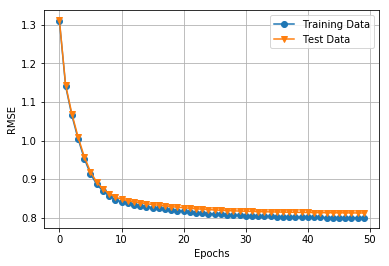

In [16]:
plt.plot(range(n_iter), train_errors, marker='o', label='Training Data');
plt.plot(range(n_iter), test_errors, marker='v', label='Test Data');
plt.xlabel('Epochs');
plt.ylabel('RMSE');
plt.legend()
plt.grid()
plt.show()

In [20]:
trainset = pd.DataFrame(trainset)
strainset=pd.DataFrame(prediction(P,Q))
rating_result = pd.DataFrame(data=trainset.loc[7,trainset.loc[7,:] > 0]).head(n=5)
rating_result['Prediction'] = strainset.loc[7,trainset.loc[7,:] > 0]
rating_result.columns = ['Actual Rating', 'Predicted Rating']
rating_result

,Actual Rating,Predicted Rating
0,3.5,3.354770
6,2.5,2.723754
26,3.0,3.454405
49,4.0,3.014000
105,4.0,3.790832


**CF**

In [23]:
def similarity(ratings, kind='user', epsilon=1e-9):
    # epsilon - >处理零除错误的小数字
    if kind == 'user':
        sim = ratings.dot(ratings.T) + epsilon
        #print(sim)
    elif kind == 'item':
        sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    #print(norms.T.dot(norms))
    return (sim / (norms.T.dot(norms)))

In [24]:
user_similarity = similarity(train_build, kind='user')
item_similarity = similarity(train_build, kind='item')
item_similarity

movieId,1,2,3,5,6,7,10,11,14,16,...,116797,119145,122882,122886,122892,122904,134130,134853,148626,152081
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.454397,0.267114,0.265525,0.381293,0.274405,0.422687,0.341367,0.156561,0.344605,...,0.214639,0.194472,0.230640,0.242026,0.201505,0.214217,0.235929,0.250660,0.165905,0.194148
2,0.454397,1.000000,0.274667,0.280887,0.291595,0.254832,0.397229,0.279282,0.130903,0.280690,...,0.154419,0.152849,0.171997,0.187866,0.162443,0.177347,0.180875,0.177313,0.116576,0.151051
3,0.267114,0.274667,1.000000,0.351085,0.227530,0.297823,0.266720,0.306551,0.172548,0.232639,...,0.039366,0.039820,0.040413,0.053167,0.044976,0.042502,0.048267,0.043533,0.039569,0.037605
5,0.265525,0.280887,0.351085,1.000000,0.190847,0.321593,0.243711,0.314410,0.157480,0.191000,...,0.058944,0.058376,0.056032,0.067141,0.058524,0.054168,0.069627,0.063536,0.056385,0.048420
6,0.381293,0.291595,0.227530,0.190847,1.000000,0.214333,0.397899,0.273643,0.194011,0.473401,...,0.142491,0.125130,0.159276,0.139935,0.111814,0.120734,0.149223,0.118088,0.133118,0.086303
7,0.274405,0.254832,0.297823,0.321593,0.214333,1.000000,0.256097,0.394462,0.186605,0.205791,...,0.049906,0.041839,0.037945,0.050421,0.043148,0.036109,0.049295,0.045724,0.040851,0.034091
10,0.422687,0.397229,0.266720,0.243711,0.397899,0.256097,1.000000,0.306338,0.159514,0.330045,...,0.107339,0.106026,0.125221,0.129846,0.111583,0.105656,0.122918,0.105865,0.094780,0.079377
11,0.341367,0.279282,0.306551,0.314410,0.273643,0.394462,0.306338,1.000000,0.225138,0.264658,...,0.060074,0.047474,0.043670,0.062077,0.051593,0.047160,0.066089,0.053569,0.057359,0.040768
14,0.156561,0.130903,0.172548,0.157480,0.194011,0.186605,0.159514,0.225138,1.000000,0.220825,...,0.030222,0.019644,0.027497,0.028778,0.020386,0.018853,0.033009,0.022301,0.041845,0.017948


In [25]:
def predict(ratings, similarity, kind='user'):
    if kind == 'user':
        res = similarity.dot(ratings)
        #print(res.shape)
        sums = np.zeros(res.shape)
        array_1 = np.array([np.abs(similarity).sum(axis=1)]).T
        array_temp = np.array([np.abs(similarity).sum(axis=1)]).T
        for i in range(res.shape[1]-1): 
            array_temp = np.c_[array_temp,array_1]
            #print(array_temp.shape)
        return res / array_temp
    elif kind == 'item':
        res = ratings.dot(similarity)
        #print(res.shape)
        sums = np.zeros(res.shape)
        array_1 = np.array([np.abs(similarity).sum(axis=1)])
        array_temp = np.array([np.abs(similarity).sum(axis=1)])
        for i in range(res.shape[0]-1): 
            array_temp = np.r_[array_temp,array_1]
            #print(array_temp.shape)
        return res / array_temp
        #return res / sums
        #return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [56]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    #一维
    pred = pred.iloc[actual.nonzero()].flatten()
    actual = actual.iloc[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [27]:
user_prediction = predict(train_build, user_similarity, kind='user')

In [28]:
user_prediction

movieId,1,2,3,5,6,7,10,11,14,16,...,116797,119145,122882,122886,122892,122904,134130,134853,148626,152081
userId,,,,,,,,,,,,,,,,,,,,,
11,2.121557,0.959717,0.289000,0.266962,1.088706,0.313790,0.982986,0.536097,0.129351,0.900574,...,0.517064,0.367398,0.542919,0.513487,0.317044,0.435784,0.578887,0.477000,0.300033,0.284184
12,2.151664,0.872661,0.336533,0.290248,1.134073,0.402980,0.975425,0.720177,0.195836,0.982566,...,0.298834,0.198867,0.318388,0.308087,0.171278,0.242855,0.338438,0.280844,0.184363,0.163209
15,2.115186,0.898371,0.280552,0.242463,1.155682,0.308583,0.984899,0.548222,0.140064,0.942553,...,0.461287,0.339089,0.511749,0.481949,0.293964,0.404061,0.528697,0.438040,0.275547,0.259964
16,2.081611,0.904968,0.272895,0.235041,1.115159,0.290732,0.975687,0.523014,0.133496,0.922116,...,0.485457,0.355030,0.545829,0.513043,0.310582,0.435505,0.571520,0.463962,0.285621,0.275481
20,2.230679,0.988022,0.285483,0.267467,0.980175,0.316170,0.954179,0.532993,0.118080,0.822868,...,0.514710,0.380043,0.550648,0.545935,0.338943,0.465872,0.584684,0.531761,0.294801,0.324059
24,2.152985,0.940498,0.379111,0.323361,1.199846,0.429976,1.054513,0.768304,0.198861,1.029483,...,0.290469,0.203260,0.315005,0.311708,0.178981,0.248207,0.337608,0.273836,0.181860,0.162676
34,2.095760,0.929444,0.292999,0.253989,1.163698,0.315942,1.007310,0.558881,0.146687,0.972241,...,0.450774,0.320602,0.500303,0.464656,0.278909,0.386249,0.512144,0.415680,0.262900,0.246942
37,2.199920,0.937647,0.326583,0.292474,1.089179,0.374604,1.002342,0.650534,0.155608,0.927636,...,0.375729,0.259207,0.397879,0.385195,0.225430,0.315938,0.425885,0.360427,0.224233,0.212791
41,2.241506,0.992724,0.271539,0.273129,0.916498,0.318943,0.886402,0.520689,0.104748,0.767177,...,0.625544,0.480133,0.646751,0.643616,0.436197,0.562337,0.698379,0.642966,0.338471,0.397030


In [102]:
item_prediction = predict(train_build, item_similarity, kind='item')

(33087, 1085)
(2, 1085)
(3, 1085)
(4, 1085)
(5, 1085)
(6, 1085)
(7, 1085)
(8, 1085)
(9, 1085)
(10, 1085)
(11, 1085)
(12, 1085)
(13, 1085)
(14, 1085)
(15, 1085)
(16, 1085)
(17, 1085)
(18, 1085)
(19, 1085)
(20, 1085)
(21, 1085)
(22, 1085)
(23, 1085)
(24, 1085)
(25, 1085)
(26, 1085)
(27, 1085)
(28, 1085)
(29, 1085)
(30, 1085)
(31, 1085)
(32, 1085)
(33, 1085)
(34, 1085)
(35, 1085)
(36, 1085)
(37, 1085)
(38, 1085)
(39, 1085)
(40, 1085)
(41, 1085)
(42, 1085)
(43, 1085)
(44, 1085)
(45, 1085)
(46, 1085)
(47, 1085)
(48, 1085)
(49, 1085)
(50, 1085)
(51, 1085)
(52, 1085)
(53, 1085)
(54, 1085)
(55, 1085)
(56, 1085)
(57, 1085)
(58, 1085)
(59, 1085)
(60, 1085)
(61, 1085)
(62, 1085)
(63, 1085)
(64, 1085)
(65, 1085)
(66, 1085)
(67, 1085)
(68, 1085)
(69, 1085)
(70, 1085)
(71, 1085)
(72, 1085)
(73, 1085)
(74, 1085)
(75, 1085)
(76, 1085)
(77, 1085)
(78, 1085)
(79, 1085)
(80, 1085)
(81, 1085)
(82, 1085)
(83, 1085)
(84, 1085)
(85, 1085)
(86, 1085)
(87, 1085)
(88, 1085)
(89, 1085)
(90, 1085)
(91, 1085)
(92,

(717, 1085)
(718, 1085)
(719, 1085)
(720, 1085)
(721, 1085)
(722, 1085)
(723, 1085)
(724, 1085)
(725, 1085)
(726, 1085)
(727, 1085)
(728, 1085)
(729, 1085)
(730, 1085)
(731, 1085)
(732, 1085)
(733, 1085)
(734, 1085)
(735, 1085)
(736, 1085)
(737, 1085)
(738, 1085)
(739, 1085)
(740, 1085)
(741, 1085)
(742, 1085)
(743, 1085)
(744, 1085)
(745, 1085)
(746, 1085)
(747, 1085)
(748, 1085)
(749, 1085)
(750, 1085)
(751, 1085)
(752, 1085)
(753, 1085)
(754, 1085)
(755, 1085)
(756, 1085)
(757, 1085)
(758, 1085)
(759, 1085)
(760, 1085)
(761, 1085)
(762, 1085)
(763, 1085)
(764, 1085)
(765, 1085)
(766, 1085)
(767, 1085)
(768, 1085)
(769, 1085)
(770, 1085)
(771, 1085)
(772, 1085)
(773, 1085)
(774, 1085)
(775, 1085)
(776, 1085)
(777, 1085)
(778, 1085)
(779, 1085)
(780, 1085)
(781, 1085)
(782, 1085)
(783, 1085)
(784, 1085)
(785, 1085)
(786, 1085)
(787, 1085)
(788, 1085)
(789, 1085)
(790, 1085)
(791, 1085)
(792, 1085)
(793, 1085)
(794, 1085)
(795, 1085)
(796, 1085)
(797, 1085)
(798, 1085)
(799, 1085)
(800

(1477, 1085)
(1478, 1085)
(1479, 1085)
(1480, 1085)
(1481, 1085)
(1482, 1085)
(1483, 1085)
(1484, 1085)
(1485, 1085)
(1486, 1085)
(1487, 1085)
(1488, 1085)
(1489, 1085)
(1490, 1085)
(1491, 1085)
(1492, 1085)
(1493, 1085)
(1494, 1085)
(1495, 1085)
(1496, 1085)
(1497, 1085)
(1498, 1085)
(1499, 1085)
(1500, 1085)
(1501, 1085)
(1502, 1085)
(1503, 1085)
(1504, 1085)
(1505, 1085)
(1506, 1085)
(1507, 1085)
(1508, 1085)
(1509, 1085)
(1510, 1085)
(1511, 1085)
(1512, 1085)
(1513, 1085)
(1514, 1085)
(1515, 1085)
(1516, 1085)
(1517, 1085)
(1518, 1085)
(1519, 1085)
(1520, 1085)
(1521, 1085)
(1522, 1085)
(1523, 1085)
(1524, 1085)
(1525, 1085)
(1526, 1085)
(1527, 1085)
(1528, 1085)
(1529, 1085)
(1530, 1085)
(1531, 1085)
(1532, 1085)
(1533, 1085)
(1534, 1085)
(1535, 1085)
(1536, 1085)
(1537, 1085)
(1538, 1085)
(1539, 1085)
(1540, 1085)
(1541, 1085)
(1542, 1085)
(1543, 1085)
(1544, 1085)
(1545, 1085)
(1546, 1085)
(1547, 1085)
(1548, 1085)
(1549, 1085)
(1550, 1085)
(1551, 1085)
(1552, 1085)
(1553, 1085)

(2124, 1085)
(2125, 1085)
(2126, 1085)
(2127, 1085)
(2128, 1085)
(2129, 1085)
(2130, 1085)
(2131, 1085)
(2132, 1085)
(2133, 1085)
(2134, 1085)
(2135, 1085)
(2136, 1085)
(2137, 1085)
(2138, 1085)
(2139, 1085)
(2140, 1085)
(2141, 1085)
(2142, 1085)
(2143, 1085)
(2144, 1085)
(2145, 1085)
(2146, 1085)
(2147, 1085)
(2148, 1085)
(2149, 1085)
(2150, 1085)
(2151, 1085)
(2152, 1085)
(2153, 1085)
(2154, 1085)
(2155, 1085)
(2156, 1085)
(2157, 1085)
(2158, 1085)
(2159, 1085)
(2160, 1085)
(2161, 1085)
(2162, 1085)
(2163, 1085)
(2164, 1085)
(2165, 1085)
(2166, 1085)
(2167, 1085)
(2168, 1085)
(2169, 1085)
(2170, 1085)
(2171, 1085)
(2172, 1085)
(2173, 1085)
(2174, 1085)
(2175, 1085)
(2176, 1085)
(2177, 1085)
(2178, 1085)
(2179, 1085)
(2180, 1085)
(2181, 1085)
(2182, 1085)
(2183, 1085)
(2184, 1085)
(2185, 1085)
(2186, 1085)
(2187, 1085)
(2188, 1085)
(2189, 1085)
(2190, 1085)
(2191, 1085)
(2192, 1085)
(2193, 1085)
(2194, 1085)
(2195, 1085)
(2196, 1085)
(2197, 1085)
(2198, 1085)
(2199, 1085)
(2200, 1085)

(2763, 1085)
(2764, 1085)
(2765, 1085)
(2766, 1085)
(2767, 1085)
(2768, 1085)
(2769, 1085)
(2770, 1085)
(2771, 1085)
(2772, 1085)
(2773, 1085)
(2774, 1085)
(2775, 1085)
(2776, 1085)
(2777, 1085)
(2778, 1085)
(2779, 1085)
(2780, 1085)
(2781, 1085)
(2782, 1085)
(2783, 1085)
(2784, 1085)
(2785, 1085)
(2786, 1085)
(2787, 1085)
(2788, 1085)
(2789, 1085)
(2790, 1085)
(2791, 1085)
(2792, 1085)
(2793, 1085)
(2794, 1085)
(2795, 1085)
(2796, 1085)
(2797, 1085)
(2798, 1085)
(2799, 1085)
(2800, 1085)
(2801, 1085)
(2802, 1085)
(2803, 1085)
(2804, 1085)
(2805, 1085)
(2806, 1085)
(2807, 1085)
(2808, 1085)
(2809, 1085)
(2810, 1085)
(2811, 1085)
(2812, 1085)
(2813, 1085)
(2814, 1085)
(2815, 1085)
(2816, 1085)
(2817, 1085)
(2818, 1085)
(2819, 1085)
(2820, 1085)
(2821, 1085)
(2822, 1085)
(2823, 1085)
(2824, 1085)
(2825, 1085)
(2826, 1085)
(2827, 1085)
(2828, 1085)
(2829, 1085)
(2830, 1085)
(2831, 1085)
(2832, 1085)
(2833, 1085)
(2834, 1085)
(2835, 1085)
(2836, 1085)
(2837, 1085)
(2838, 1085)
(2839, 1085)

(3403, 1085)
(3404, 1085)
(3405, 1085)
(3406, 1085)
(3407, 1085)
(3408, 1085)
(3409, 1085)
(3410, 1085)
(3411, 1085)
(3412, 1085)
(3413, 1085)
(3414, 1085)
(3415, 1085)
(3416, 1085)
(3417, 1085)
(3418, 1085)
(3419, 1085)
(3420, 1085)
(3421, 1085)
(3422, 1085)
(3423, 1085)
(3424, 1085)
(3425, 1085)
(3426, 1085)
(3427, 1085)
(3428, 1085)
(3429, 1085)
(3430, 1085)
(3431, 1085)
(3432, 1085)
(3433, 1085)
(3434, 1085)
(3435, 1085)
(3436, 1085)
(3437, 1085)
(3438, 1085)
(3439, 1085)
(3440, 1085)
(3441, 1085)
(3442, 1085)
(3443, 1085)
(3444, 1085)
(3445, 1085)
(3446, 1085)
(3447, 1085)
(3448, 1085)
(3449, 1085)
(3450, 1085)
(3451, 1085)
(3452, 1085)
(3453, 1085)
(3454, 1085)
(3455, 1085)
(3456, 1085)
(3457, 1085)
(3458, 1085)
(3459, 1085)
(3460, 1085)
(3461, 1085)
(3462, 1085)
(3463, 1085)
(3464, 1085)
(3465, 1085)
(3466, 1085)
(3467, 1085)
(3468, 1085)
(3469, 1085)
(3470, 1085)
(3471, 1085)
(3472, 1085)
(3473, 1085)
(3474, 1085)
(3475, 1085)
(3476, 1085)
(3477, 1085)
(3478, 1085)
(3479, 1085)

(4045, 1085)
(4046, 1085)
(4047, 1085)
(4048, 1085)
(4049, 1085)
(4050, 1085)
(4051, 1085)
(4052, 1085)
(4053, 1085)
(4054, 1085)
(4055, 1085)
(4056, 1085)
(4057, 1085)
(4058, 1085)
(4059, 1085)
(4060, 1085)
(4061, 1085)
(4062, 1085)
(4063, 1085)
(4064, 1085)
(4065, 1085)
(4066, 1085)
(4067, 1085)
(4068, 1085)
(4069, 1085)
(4070, 1085)
(4071, 1085)
(4072, 1085)
(4073, 1085)
(4074, 1085)
(4075, 1085)
(4076, 1085)
(4077, 1085)
(4078, 1085)
(4079, 1085)
(4080, 1085)
(4081, 1085)
(4082, 1085)
(4083, 1085)
(4084, 1085)
(4085, 1085)
(4086, 1085)
(4087, 1085)
(4088, 1085)
(4089, 1085)
(4090, 1085)
(4091, 1085)
(4092, 1085)
(4093, 1085)
(4094, 1085)
(4095, 1085)
(4096, 1085)
(4097, 1085)
(4098, 1085)
(4099, 1085)
(4100, 1085)
(4101, 1085)
(4102, 1085)
(4103, 1085)
(4104, 1085)
(4105, 1085)
(4106, 1085)
(4107, 1085)
(4108, 1085)
(4109, 1085)
(4110, 1085)
(4111, 1085)
(4112, 1085)
(4113, 1085)
(4114, 1085)
(4115, 1085)
(4116, 1085)
(4117, 1085)
(4118, 1085)
(4119, 1085)
(4120, 1085)
(4121, 1085)

(4678, 1085)
(4679, 1085)
(4680, 1085)
(4681, 1085)
(4682, 1085)
(4683, 1085)
(4684, 1085)
(4685, 1085)
(4686, 1085)
(4687, 1085)
(4688, 1085)
(4689, 1085)
(4690, 1085)
(4691, 1085)
(4692, 1085)
(4693, 1085)
(4694, 1085)
(4695, 1085)
(4696, 1085)
(4697, 1085)
(4698, 1085)
(4699, 1085)
(4700, 1085)
(4701, 1085)
(4702, 1085)
(4703, 1085)
(4704, 1085)
(4705, 1085)
(4706, 1085)
(4707, 1085)
(4708, 1085)
(4709, 1085)
(4710, 1085)
(4711, 1085)
(4712, 1085)
(4713, 1085)
(4714, 1085)
(4715, 1085)
(4716, 1085)
(4717, 1085)
(4718, 1085)
(4719, 1085)
(4720, 1085)
(4721, 1085)
(4722, 1085)
(4723, 1085)
(4724, 1085)
(4725, 1085)
(4726, 1085)
(4727, 1085)
(4728, 1085)
(4729, 1085)
(4730, 1085)
(4731, 1085)
(4732, 1085)
(4733, 1085)
(4734, 1085)
(4735, 1085)
(4736, 1085)
(4737, 1085)
(4738, 1085)
(4739, 1085)
(4740, 1085)
(4741, 1085)
(4742, 1085)
(4743, 1085)
(4744, 1085)
(4745, 1085)
(4746, 1085)
(4747, 1085)
(4748, 1085)
(4749, 1085)
(4750, 1085)
(4751, 1085)
(4752, 1085)
(4753, 1085)
(4754, 1085)

(5320, 1085)
(5321, 1085)
(5322, 1085)
(5323, 1085)
(5324, 1085)
(5325, 1085)
(5326, 1085)
(5327, 1085)
(5328, 1085)
(5329, 1085)
(5330, 1085)
(5331, 1085)
(5332, 1085)
(5333, 1085)
(5334, 1085)
(5335, 1085)
(5336, 1085)
(5337, 1085)
(5338, 1085)
(5339, 1085)
(5340, 1085)
(5341, 1085)
(5342, 1085)
(5343, 1085)
(5344, 1085)
(5345, 1085)
(5346, 1085)
(5347, 1085)
(5348, 1085)
(5349, 1085)
(5350, 1085)
(5351, 1085)
(5352, 1085)
(5353, 1085)
(5354, 1085)
(5355, 1085)
(5356, 1085)
(5357, 1085)
(5358, 1085)
(5359, 1085)
(5360, 1085)
(5361, 1085)
(5362, 1085)
(5363, 1085)
(5364, 1085)
(5365, 1085)
(5366, 1085)
(5367, 1085)
(5368, 1085)
(5369, 1085)
(5370, 1085)
(5371, 1085)
(5372, 1085)
(5373, 1085)
(5374, 1085)
(5375, 1085)
(5376, 1085)
(5377, 1085)
(5378, 1085)
(5379, 1085)
(5380, 1085)
(5381, 1085)
(5382, 1085)
(5383, 1085)
(5384, 1085)
(5385, 1085)
(5386, 1085)
(5387, 1085)
(5388, 1085)
(5389, 1085)
(5390, 1085)
(5391, 1085)
(5392, 1085)
(5393, 1085)
(5394, 1085)
(5395, 1085)
(5396, 1085)

(5951, 1085)
(5952, 1085)
(5953, 1085)
(5954, 1085)
(5955, 1085)
(5956, 1085)
(5957, 1085)
(5958, 1085)
(5959, 1085)
(5960, 1085)
(5961, 1085)
(5962, 1085)
(5963, 1085)
(5964, 1085)
(5965, 1085)
(5966, 1085)
(5967, 1085)
(5968, 1085)
(5969, 1085)
(5970, 1085)
(5971, 1085)
(5972, 1085)
(5973, 1085)
(5974, 1085)
(5975, 1085)
(5976, 1085)
(5977, 1085)
(5978, 1085)
(5979, 1085)
(5980, 1085)
(5981, 1085)
(5982, 1085)
(5983, 1085)
(5984, 1085)
(5985, 1085)
(5986, 1085)
(5987, 1085)
(5988, 1085)
(5989, 1085)
(5990, 1085)
(5991, 1085)
(5992, 1085)
(5993, 1085)
(5994, 1085)
(5995, 1085)
(5996, 1085)
(5997, 1085)
(5998, 1085)
(5999, 1085)
(6000, 1085)
(6001, 1085)
(6002, 1085)
(6003, 1085)
(6004, 1085)
(6005, 1085)
(6006, 1085)
(6007, 1085)
(6008, 1085)
(6009, 1085)
(6010, 1085)
(6011, 1085)
(6012, 1085)
(6013, 1085)
(6014, 1085)
(6015, 1085)
(6016, 1085)
(6017, 1085)
(6018, 1085)
(6019, 1085)
(6020, 1085)
(6021, 1085)
(6022, 1085)
(6023, 1085)
(6024, 1085)
(6025, 1085)
(6026, 1085)
(6027, 1085)

(6590, 1085)
(6591, 1085)
(6592, 1085)
(6593, 1085)
(6594, 1085)
(6595, 1085)
(6596, 1085)
(6597, 1085)
(6598, 1085)
(6599, 1085)
(6600, 1085)
(6601, 1085)
(6602, 1085)
(6603, 1085)
(6604, 1085)
(6605, 1085)
(6606, 1085)
(6607, 1085)
(6608, 1085)
(6609, 1085)
(6610, 1085)
(6611, 1085)
(6612, 1085)
(6613, 1085)
(6614, 1085)
(6615, 1085)
(6616, 1085)
(6617, 1085)
(6618, 1085)
(6619, 1085)
(6620, 1085)
(6621, 1085)
(6622, 1085)
(6623, 1085)
(6624, 1085)
(6625, 1085)
(6626, 1085)
(6627, 1085)
(6628, 1085)
(6629, 1085)
(6630, 1085)
(6631, 1085)
(6632, 1085)
(6633, 1085)
(6634, 1085)
(6635, 1085)
(6636, 1085)
(6637, 1085)
(6638, 1085)
(6639, 1085)
(6640, 1085)
(6641, 1085)
(6642, 1085)
(6643, 1085)
(6644, 1085)
(6645, 1085)
(6646, 1085)
(6647, 1085)
(6648, 1085)
(6649, 1085)
(6650, 1085)
(6651, 1085)
(6652, 1085)
(6653, 1085)
(6654, 1085)
(6655, 1085)
(6656, 1085)
(6657, 1085)
(6658, 1085)
(6659, 1085)
(6660, 1085)
(6661, 1085)
(6662, 1085)
(6663, 1085)
(6664, 1085)
(6665, 1085)
(6666, 1085)

(7221, 1085)
(7222, 1085)
(7223, 1085)
(7224, 1085)
(7225, 1085)
(7226, 1085)
(7227, 1085)
(7228, 1085)
(7229, 1085)
(7230, 1085)
(7231, 1085)
(7232, 1085)
(7233, 1085)
(7234, 1085)
(7235, 1085)
(7236, 1085)
(7237, 1085)
(7238, 1085)
(7239, 1085)
(7240, 1085)
(7241, 1085)
(7242, 1085)
(7243, 1085)
(7244, 1085)
(7245, 1085)
(7246, 1085)
(7247, 1085)
(7248, 1085)
(7249, 1085)
(7250, 1085)
(7251, 1085)
(7252, 1085)
(7253, 1085)
(7254, 1085)
(7255, 1085)
(7256, 1085)
(7257, 1085)
(7258, 1085)
(7259, 1085)
(7260, 1085)
(7261, 1085)
(7262, 1085)
(7263, 1085)
(7264, 1085)
(7265, 1085)
(7266, 1085)
(7267, 1085)
(7268, 1085)
(7269, 1085)
(7270, 1085)
(7271, 1085)
(7272, 1085)
(7273, 1085)
(7274, 1085)
(7275, 1085)
(7276, 1085)
(7277, 1085)
(7278, 1085)
(7279, 1085)
(7280, 1085)
(7281, 1085)
(7282, 1085)
(7283, 1085)
(7284, 1085)
(7285, 1085)
(7286, 1085)
(7287, 1085)
(7288, 1085)
(7289, 1085)
(7290, 1085)
(7291, 1085)
(7292, 1085)
(7293, 1085)
(7294, 1085)
(7295, 1085)
(7296, 1085)
(7297, 1085)

(7852, 1085)
(7853, 1085)
(7854, 1085)
(7855, 1085)
(7856, 1085)
(7857, 1085)
(7858, 1085)
(7859, 1085)
(7860, 1085)
(7861, 1085)
(7862, 1085)
(7863, 1085)
(7864, 1085)
(7865, 1085)
(7866, 1085)
(7867, 1085)
(7868, 1085)
(7869, 1085)
(7870, 1085)
(7871, 1085)
(7872, 1085)
(7873, 1085)
(7874, 1085)
(7875, 1085)
(7876, 1085)
(7877, 1085)
(7878, 1085)
(7879, 1085)
(7880, 1085)
(7881, 1085)
(7882, 1085)
(7883, 1085)
(7884, 1085)
(7885, 1085)
(7886, 1085)
(7887, 1085)
(7888, 1085)
(7889, 1085)
(7890, 1085)
(7891, 1085)
(7892, 1085)
(7893, 1085)
(7894, 1085)
(7895, 1085)
(7896, 1085)
(7897, 1085)
(7898, 1085)
(7899, 1085)
(7900, 1085)
(7901, 1085)
(7902, 1085)
(7903, 1085)
(7904, 1085)
(7905, 1085)
(7906, 1085)
(7907, 1085)
(7908, 1085)
(7909, 1085)
(7910, 1085)
(7911, 1085)
(7912, 1085)
(7913, 1085)
(7914, 1085)
(7915, 1085)
(7916, 1085)
(7917, 1085)
(7918, 1085)
(7919, 1085)
(7920, 1085)
(7921, 1085)
(7922, 1085)
(7923, 1085)
(7924, 1085)
(7925, 1085)
(7926, 1085)
(7927, 1085)
(7928, 1085)

(8489, 1085)
(8490, 1085)
(8491, 1085)
(8492, 1085)
(8493, 1085)
(8494, 1085)
(8495, 1085)
(8496, 1085)
(8497, 1085)
(8498, 1085)
(8499, 1085)
(8500, 1085)
(8501, 1085)
(8502, 1085)
(8503, 1085)
(8504, 1085)
(8505, 1085)
(8506, 1085)
(8507, 1085)
(8508, 1085)
(8509, 1085)
(8510, 1085)
(8511, 1085)
(8512, 1085)
(8513, 1085)
(8514, 1085)
(8515, 1085)
(8516, 1085)
(8517, 1085)
(8518, 1085)
(8519, 1085)
(8520, 1085)
(8521, 1085)
(8522, 1085)
(8523, 1085)
(8524, 1085)
(8525, 1085)
(8526, 1085)
(8527, 1085)
(8528, 1085)
(8529, 1085)
(8530, 1085)
(8531, 1085)
(8532, 1085)
(8533, 1085)
(8534, 1085)
(8535, 1085)
(8536, 1085)
(8537, 1085)
(8538, 1085)
(8539, 1085)
(8540, 1085)
(8541, 1085)
(8542, 1085)
(8543, 1085)
(8544, 1085)
(8545, 1085)
(8546, 1085)
(8547, 1085)
(8548, 1085)
(8549, 1085)
(8550, 1085)
(8551, 1085)
(8552, 1085)
(8553, 1085)
(8554, 1085)
(8555, 1085)
(8556, 1085)
(8557, 1085)
(8558, 1085)
(8559, 1085)
(8560, 1085)
(8561, 1085)
(8562, 1085)
(8563, 1085)
(8564, 1085)
(8565, 1085)

(9121, 1085)
(9122, 1085)
(9123, 1085)
(9124, 1085)
(9125, 1085)
(9126, 1085)
(9127, 1085)
(9128, 1085)
(9129, 1085)
(9130, 1085)
(9131, 1085)
(9132, 1085)
(9133, 1085)
(9134, 1085)
(9135, 1085)
(9136, 1085)
(9137, 1085)
(9138, 1085)
(9139, 1085)
(9140, 1085)
(9141, 1085)
(9142, 1085)
(9143, 1085)
(9144, 1085)
(9145, 1085)
(9146, 1085)
(9147, 1085)
(9148, 1085)
(9149, 1085)
(9150, 1085)
(9151, 1085)
(9152, 1085)
(9153, 1085)
(9154, 1085)
(9155, 1085)
(9156, 1085)
(9157, 1085)
(9158, 1085)
(9159, 1085)
(9160, 1085)
(9161, 1085)
(9162, 1085)
(9163, 1085)
(9164, 1085)
(9165, 1085)
(9166, 1085)
(9167, 1085)
(9168, 1085)
(9169, 1085)
(9170, 1085)
(9171, 1085)
(9172, 1085)
(9173, 1085)
(9174, 1085)
(9175, 1085)
(9176, 1085)
(9177, 1085)
(9178, 1085)
(9179, 1085)
(9180, 1085)
(9181, 1085)
(9182, 1085)
(9183, 1085)
(9184, 1085)
(9185, 1085)
(9186, 1085)
(9187, 1085)
(9188, 1085)
(9189, 1085)
(9190, 1085)
(9191, 1085)
(9192, 1085)
(9193, 1085)
(9194, 1085)
(9195, 1085)
(9196, 1085)
(9197, 1085)

(9752, 1085)
(9753, 1085)
(9754, 1085)
(9755, 1085)
(9756, 1085)
(9757, 1085)
(9758, 1085)
(9759, 1085)
(9760, 1085)
(9761, 1085)
(9762, 1085)
(9763, 1085)
(9764, 1085)
(9765, 1085)
(9766, 1085)
(9767, 1085)
(9768, 1085)
(9769, 1085)
(9770, 1085)
(9771, 1085)
(9772, 1085)
(9773, 1085)
(9774, 1085)
(9775, 1085)
(9776, 1085)
(9777, 1085)
(9778, 1085)
(9779, 1085)
(9780, 1085)
(9781, 1085)
(9782, 1085)
(9783, 1085)
(9784, 1085)
(9785, 1085)
(9786, 1085)
(9787, 1085)
(9788, 1085)
(9789, 1085)
(9790, 1085)
(9791, 1085)
(9792, 1085)
(9793, 1085)
(9794, 1085)
(9795, 1085)
(9796, 1085)
(9797, 1085)
(9798, 1085)
(9799, 1085)
(9800, 1085)
(9801, 1085)
(9802, 1085)
(9803, 1085)
(9804, 1085)
(9805, 1085)
(9806, 1085)
(9807, 1085)
(9808, 1085)
(9809, 1085)
(9810, 1085)
(9811, 1085)
(9812, 1085)
(9813, 1085)
(9814, 1085)
(9815, 1085)
(9816, 1085)
(9817, 1085)
(9818, 1085)
(9819, 1085)
(9820, 1085)
(9821, 1085)
(9822, 1085)
(9823, 1085)
(9824, 1085)
(9825, 1085)
(9826, 1085)
(9827, 1085)
(9828, 1085)

(10355, 1085)
(10356, 1085)
(10357, 1085)
(10358, 1085)
(10359, 1085)
(10360, 1085)
(10361, 1085)
(10362, 1085)
(10363, 1085)
(10364, 1085)
(10365, 1085)
(10366, 1085)
(10367, 1085)
(10368, 1085)
(10369, 1085)
(10370, 1085)
(10371, 1085)
(10372, 1085)
(10373, 1085)
(10374, 1085)
(10375, 1085)
(10376, 1085)
(10377, 1085)
(10378, 1085)
(10379, 1085)
(10380, 1085)
(10381, 1085)
(10382, 1085)
(10383, 1085)
(10384, 1085)
(10385, 1085)
(10386, 1085)
(10387, 1085)
(10388, 1085)
(10389, 1085)
(10390, 1085)
(10391, 1085)
(10392, 1085)
(10393, 1085)
(10394, 1085)
(10395, 1085)
(10396, 1085)
(10397, 1085)
(10398, 1085)
(10399, 1085)
(10400, 1085)
(10401, 1085)
(10402, 1085)
(10403, 1085)
(10404, 1085)
(10405, 1085)
(10406, 1085)
(10407, 1085)
(10408, 1085)
(10409, 1085)
(10410, 1085)
(10411, 1085)
(10412, 1085)
(10413, 1085)
(10414, 1085)
(10415, 1085)
(10416, 1085)
(10417, 1085)
(10418, 1085)
(10419, 1085)
(10420, 1085)
(10421, 1085)
(10422, 1085)
(10423, 1085)
(10424, 1085)
(10425, 1085)
(10426

(10943, 1085)
(10944, 1085)
(10945, 1085)
(10946, 1085)
(10947, 1085)
(10948, 1085)
(10949, 1085)
(10950, 1085)
(10951, 1085)
(10952, 1085)
(10953, 1085)
(10954, 1085)
(10955, 1085)
(10956, 1085)
(10957, 1085)
(10958, 1085)
(10959, 1085)
(10960, 1085)
(10961, 1085)
(10962, 1085)
(10963, 1085)
(10964, 1085)
(10965, 1085)
(10966, 1085)
(10967, 1085)
(10968, 1085)
(10969, 1085)
(10970, 1085)
(10971, 1085)
(10972, 1085)
(10973, 1085)
(10974, 1085)
(10975, 1085)
(10976, 1085)
(10977, 1085)
(10978, 1085)
(10979, 1085)
(10980, 1085)
(10981, 1085)
(10982, 1085)
(10983, 1085)
(10984, 1085)
(10985, 1085)
(10986, 1085)
(10987, 1085)
(10988, 1085)
(10989, 1085)
(10990, 1085)
(10991, 1085)
(10992, 1085)
(10993, 1085)
(10994, 1085)
(10995, 1085)
(10996, 1085)
(10997, 1085)
(10998, 1085)
(10999, 1085)
(11000, 1085)
(11001, 1085)
(11002, 1085)
(11003, 1085)
(11004, 1085)
(11005, 1085)
(11006, 1085)
(11007, 1085)
(11008, 1085)
(11009, 1085)
(11010, 1085)
(11011, 1085)
(11012, 1085)
(11013, 1085)
(11014

(11530, 1085)
(11531, 1085)
(11532, 1085)
(11533, 1085)
(11534, 1085)
(11535, 1085)
(11536, 1085)
(11537, 1085)
(11538, 1085)
(11539, 1085)
(11540, 1085)
(11541, 1085)
(11542, 1085)
(11543, 1085)
(11544, 1085)
(11545, 1085)
(11546, 1085)
(11547, 1085)
(11548, 1085)
(11549, 1085)
(11550, 1085)
(11551, 1085)
(11552, 1085)
(11553, 1085)
(11554, 1085)
(11555, 1085)
(11556, 1085)
(11557, 1085)
(11558, 1085)
(11559, 1085)
(11560, 1085)
(11561, 1085)
(11562, 1085)
(11563, 1085)
(11564, 1085)
(11565, 1085)
(11566, 1085)
(11567, 1085)
(11568, 1085)
(11569, 1085)
(11570, 1085)
(11571, 1085)
(11572, 1085)
(11573, 1085)
(11574, 1085)
(11575, 1085)
(11576, 1085)
(11577, 1085)
(11578, 1085)
(11579, 1085)
(11580, 1085)
(11581, 1085)
(11582, 1085)
(11583, 1085)
(11584, 1085)
(11585, 1085)
(11586, 1085)
(11587, 1085)
(11588, 1085)
(11589, 1085)
(11590, 1085)
(11591, 1085)
(11592, 1085)
(11593, 1085)
(11594, 1085)
(11595, 1085)
(11596, 1085)
(11597, 1085)
(11598, 1085)
(11599, 1085)
(11600, 1085)
(11601

(12117, 1085)
(12118, 1085)
(12119, 1085)
(12120, 1085)
(12121, 1085)
(12122, 1085)
(12123, 1085)
(12124, 1085)
(12125, 1085)
(12126, 1085)
(12127, 1085)
(12128, 1085)
(12129, 1085)
(12130, 1085)
(12131, 1085)
(12132, 1085)
(12133, 1085)
(12134, 1085)
(12135, 1085)
(12136, 1085)
(12137, 1085)
(12138, 1085)
(12139, 1085)
(12140, 1085)
(12141, 1085)
(12142, 1085)
(12143, 1085)
(12144, 1085)
(12145, 1085)
(12146, 1085)
(12147, 1085)
(12148, 1085)
(12149, 1085)
(12150, 1085)
(12151, 1085)
(12152, 1085)
(12153, 1085)
(12154, 1085)
(12155, 1085)
(12156, 1085)
(12157, 1085)
(12158, 1085)
(12159, 1085)
(12160, 1085)
(12161, 1085)
(12162, 1085)
(12163, 1085)
(12164, 1085)
(12165, 1085)
(12166, 1085)
(12167, 1085)
(12168, 1085)
(12169, 1085)
(12170, 1085)
(12171, 1085)
(12172, 1085)
(12173, 1085)
(12174, 1085)
(12175, 1085)
(12176, 1085)
(12177, 1085)
(12178, 1085)
(12179, 1085)
(12180, 1085)
(12181, 1085)
(12182, 1085)
(12183, 1085)
(12184, 1085)
(12185, 1085)
(12186, 1085)
(12187, 1085)
(12188

(12705, 1085)
(12706, 1085)
(12707, 1085)
(12708, 1085)
(12709, 1085)
(12710, 1085)
(12711, 1085)
(12712, 1085)
(12713, 1085)
(12714, 1085)
(12715, 1085)
(12716, 1085)
(12717, 1085)
(12718, 1085)
(12719, 1085)
(12720, 1085)
(12721, 1085)
(12722, 1085)
(12723, 1085)
(12724, 1085)
(12725, 1085)
(12726, 1085)
(12727, 1085)
(12728, 1085)
(12729, 1085)
(12730, 1085)
(12731, 1085)
(12732, 1085)
(12733, 1085)
(12734, 1085)
(12735, 1085)
(12736, 1085)
(12737, 1085)
(12738, 1085)
(12739, 1085)
(12740, 1085)
(12741, 1085)
(12742, 1085)
(12743, 1085)
(12744, 1085)
(12745, 1085)
(12746, 1085)
(12747, 1085)
(12748, 1085)
(12749, 1085)
(12750, 1085)
(12751, 1085)
(12752, 1085)
(12753, 1085)
(12754, 1085)
(12755, 1085)
(12756, 1085)
(12757, 1085)
(12758, 1085)
(12759, 1085)
(12760, 1085)
(12761, 1085)
(12762, 1085)
(12763, 1085)
(12764, 1085)
(12765, 1085)
(12766, 1085)
(12767, 1085)
(12768, 1085)
(12769, 1085)
(12770, 1085)
(12771, 1085)
(12772, 1085)
(12773, 1085)
(12774, 1085)
(12775, 1085)
(12776

(13293, 1085)
(13294, 1085)
(13295, 1085)
(13296, 1085)
(13297, 1085)
(13298, 1085)
(13299, 1085)
(13300, 1085)
(13301, 1085)
(13302, 1085)
(13303, 1085)
(13304, 1085)
(13305, 1085)
(13306, 1085)
(13307, 1085)
(13308, 1085)
(13309, 1085)
(13310, 1085)
(13311, 1085)
(13312, 1085)
(13313, 1085)
(13314, 1085)
(13315, 1085)
(13316, 1085)
(13317, 1085)
(13318, 1085)
(13319, 1085)
(13320, 1085)
(13321, 1085)
(13322, 1085)
(13323, 1085)
(13324, 1085)
(13325, 1085)
(13326, 1085)
(13327, 1085)
(13328, 1085)
(13329, 1085)
(13330, 1085)
(13331, 1085)
(13332, 1085)
(13333, 1085)
(13334, 1085)
(13335, 1085)
(13336, 1085)
(13337, 1085)
(13338, 1085)
(13339, 1085)
(13340, 1085)
(13341, 1085)
(13342, 1085)
(13343, 1085)
(13344, 1085)
(13345, 1085)
(13346, 1085)
(13347, 1085)
(13348, 1085)
(13349, 1085)
(13350, 1085)
(13351, 1085)
(13352, 1085)
(13353, 1085)
(13354, 1085)
(13355, 1085)
(13356, 1085)
(13357, 1085)
(13358, 1085)
(13359, 1085)
(13360, 1085)
(13361, 1085)
(13362, 1085)
(13363, 1085)
(13364

(13880, 1085)
(13881, 1085)
(13882, 1085)
(13883, 1085)
(13884, 1085)
(13885, 1085)
(13886, 1085)
(13887, 1085)
(13888, 1085)
(13889, 1085)
(13890, 1085)
(13891, 1085)
(13892, 1085)
(13893, 1085)
(13894, 1085)
(13895, 1085)
(13896, 1085)
(13897, 1085)
(13898, 1085)
(13899, 1085)
(13900, 1085)
(13901, 1085)
(13902, 1085)
(13903, 1085)
(13904, 1085)
(13905, 1085)
(13906, 1085)
(13907, 1085)
(13908, 1085)
(13909, 1085)
(13910, 1085)
(13911, 1085)
(13912, 1085)
(13913, 1085)
(13914, 1085)
(13915, 1085)
(13916, 1085)
(13917, 1085)
(13918, 1085)
(13919, 1085)
(13920, 1085)
(13921, 1085)
(13922, 1085)
(13923, 1085)
(13924, 1085)
(13925, 1085)
(13926, 1085)
(13927, 1085)
(13928, 1085)
(13929, 1085)
(13930, 1085)
(13931, 1085)
(13932, 1085)
(13933, 1085)
(13934, 1085)
(13935, 1085)
(13936, 1085)
(13937, 1085)
(13938, 1085)
(13939, 1085)
(13940, 1085)
(13941, 1085)
(13942, 1085)
(13943, 1085)
(13944, 1085)
(13945, 1085)
(13946, 1085)
(13947, 1085)
(13948, 1085)
(13949, 1085)
(13950, 1085)
(13951

(14466, 1085)
(14467, 1085)
(14468, 1085)
(14469, 1085)
(14470, 1085)
(14471, 1085)
(14472, 1085)
(14473, 1085)
(14474, 1085)
(14475, 1085)
(14476, 1085)
(14477, 1085)
(14478, 1085)
(14479, 1085)
(14480, 1085)
(14481, 1085)
(14482, 1085)
(14483, 1085)
(14484, 1085)
(14485, 1085)
(14486, 1085)
(14487, 1085)
(14488, 1085)
(14489, 1085)
(14490, 1085)
(14491, 1085)
(14492, 1085)
(14493, 1085)
(14494, 1085)
(14495, 1085)
(14496, 1085)
(14497, 1085)
(14498, 1085)
(14499, 1085)
(14500, 1085)
(14501, 1085)
(14502, 1085)
(14503, 1085)
(14504, 1085)
(14505, 1085)
(14506, 1085)
(14507, 1085)
(14508, 1085)
(14509, 1085)
(14510, 1085)
(14511, 1085)
(14512, 1085)
(14513, 1085)
(14514, 1085)
(14515, 1085)
(14516, 1085)
(14517, 1085)
(14518, 1085)
(14519, 1085)
(14520, 1085)
(14521, 1085)
(14522, 1085)
(14523, 1085)
(14524, 1085)
(14525, 1085)
(14526, 1085)
(14527, 1085)
(14528, 1085)
(14529, 1085)
(14530, 1085)
(14531, 1085)
(14532, 1085)
(14533, 1085)
(14534, 1085)
(14535, 1085)
(14536, 1085)
(14537

(15056, 1085)
(15057, 1085)
(15058, 1085)
(15059, 1085)
(15060, 1085)
(15061, 1085)
(15062, 1085)
(15063, 1085)
(15064, 1085)
(15065, 1085)
(15066, 1085)
(15067, 1085)
(15068, 1085)
(15069, 1085)
(15070, 1085)
(15071, 1085)
(15072, 1085)
(15073, 1085)
(15074, 1085)
(15075, 1085)
(15076, 1085)
(15077, 1085)
(15078, 1085)
(15079, 1085)
(15080, 1085)
(15081, 1085)
(15082, 1085)
(15083, 1085)
(15084, 1085)
(15085, 1085)
(15086, 1085)
(15087, 1085)
(15088, 1085)
(15089, 1085)
(15090, 1085)
(15091, 1085)
(15092, 1085)
(15093, 1085)
(15094, 1085)
(15095, 1085)
(15096, 1085)
(15097, 1085)
(15098, 1085)
(15099, 1085)
(15100, 1085)
(15101, 1085)
(15102, 1085)
(15103, 1085)
(15104, 1085)
(15105, 1085)
(15106, 1085)
(15107, 1085)
(15108, 1085)
(15109, 1085)
(15110, 1085)
(15111, 1085)
(15112, 1085)
(15113, 1085)
(15114, 1085)
(15115, 1085)
(15116, 1085)
(15117, 1085)
(15118, 1085)
(15119, 1085)
(15120, 1085)
(15121, 1085)
(15122, 1085)
(15123, 1085)
(15124, 1085)
(15125, 1085)
(15126, 1085)
(15127

(15646, 1085)
(15647, 1085)
(15648, 1085)
(15649, 1085)
(15650, 1085)
(15651, 1085)
(15652, 1085)
(15653, 1085)
(15654, 1085)
(15655, 1085)
(15656, 1085)
(15657, 1085)
(15658, 1085)
(15659, 1085)
(15660, 1085)
(15661, 1085)
(15662, 1085)
(15663, 1085)
(15664, 1085)
(15665, 1085)
(15666, 1085)
(15667, 1085)
(15668, 1085)
(15669, 1085)
(15670, 1085)
(15671, 1085)
(15672, 1085)
(15673, 1085)
(15674, 1085)
(15675, 1085)
(15676, 1085)
(15677, 1085)
(15678, 1085)
(15679, 1085)
(15680, 1085)
(15681, 1085)
(15682, 1085)
(15683, 1085)
(15684, 1085)
(15685, 1085)
(15686, 1085)
(15687, 1085)
(15688, 1085)
(15689, 1085)
(15690, 1085)
(15691, 1085)
(15692, 1085)
(15693, 1085)
(15694, 1085)
(15695, 1085)
(15696, 1085)
(15697, 1085)
(15698, 1085)
(15699, 1085)
(15700, 1085)
(15701, 1085)
(15702, 1085)
(15703, 1085)
(15704, 1085)
(15705, 1085)
(15706, 1085)
(15707, 1085)
(15708, 1085)
(15709, 1085)
(15710, 1085)
(15711, 1085)
(15712, 1085)
(15713, 1085)
(15714, 1085)
(15715, 1085)
(15716, 1085)
(15717

(16236, 1085)
(16237, 1085)
(16238, 1085)
(16239, 1085)
(16240, 1085)
(16241, 1085)
(16242, 1085)
(16243, 1085)
(16244, 1085)
(16245, 1085)
(16246, 1085)
(16247, 1085)
(16248, 1085)
(16249, 1085)
(16250, 1085)
(16251, 1085)
(16252, 1085)
(16253, 1085)
(16254, 1085)
(16255, 1085)
(16256, 1085)
(16257, 1085)
(16258, 1085)
(16259, 1085)
(16260, 1085)
(16261, 1085)
(16262, 1085)
(16263, 1085)
(16264, 1085)
(16265, 1085)
(16266, 1085)
(16267, 1085)
(16268, 1085)
(16269, 1085)
(16270, 1085)
(16271, 1085)
(16272, 1085)
(16273, 1085)
(16274, 1085)
(16275, 1085)
(16276, 1085)
(16277, 1085)
(16278, 1085)
(16279, 1085)
(16280, 1085)
(16281, 1085)
(16282, 1085)
(16283, 1085)
(16284, 1085)
(16285, 1085)
(16286, 1085)
(16287, 1085)
(16288, 1085)
(16289, 1085)
(16290, 1085)
(16291, 1085)
(16292, 1085)
(16293, 1085)
(16294, 1085)
(16295, 1085)
(16296, 1085)
(16297, 1085)
(16298, 1085)
(16299, 1085)
(16300, 1085)
(16301, 1085)
(16302, 1085)
(16303, 1085)
(16304, 1085)
(16305, 1085)
(16306, 1085)
(16307

(16825, 1085)
(16826, 1085)
(16827, 1085)
(16828, 1085)
(16829, 1085)
(16830, 1085)
(16831, 1085)
(16832, 1085)
(16833, 1085)
(16834, 1085)
(16835, 1085)
(16836, 1085)
(16837, 1085)
(16838, 1085)
(16839, 1085)
(16840, 1085)
(16841, 1085)
(16842, 1085)
(16843, 1085)
(16844, 1085)
(16845, 1085)
(16846, 1085)
(16847, 1085)
(16848, 1085)
(16849, 1085)
(16850, 1085)
(16851, 1085)
(16852, 1085)
(16853, 1085)
(16854, 1085)
(16855, 1085)
(16856, 1085)
(16857, 1085)
(16858, 1085)
(16859, 1085)
(16860, 1085)
(16861, 1085)
(16862, 1085)
(16863, 1085)
(16864, 1085)
(16865, 1085)
(16866, 1085)
(16867, 1085)
(16868, 1085)
(16869, 1085)
(16870, 1085)
(16871, 1085)
(16872, 1085)
(16873, 1085)
(16874, 1085)
(16875, 1085)
(16876, 1085)
(16877, 1085)
(16878, 1085)
(16879, 1085)
(16880, 1085)
(16881, 1085)
(16882, 1085)
(16883, 1085)
(16884, 1085)
(16885, 1085)
(16886, 1085)
(16887, 1085)
(16888, 1085)
(16889, 1085)
(16890, 1085)
(16891, 1085)
(16892, 1085)
(16893, 1085)
(16894, 1085)
(16895, 1085)
(16896

(17414, 1085)
(17415, 1085)
(17416, 1085)
(17417, 1085)
(17418, 1085)
(17419, 1085)
(17420, 1085)
(17421, 1085)
(17422, 1085)
(17423, 1085)
(17424, 1085)
(17425, 1085)
(17426, 1085)
(17427, 1085)
(17428, 1085)
(17429, 1085)
(17430, 1085)
(17431, 1085)
(17432, 1085)
(17433, 1085)
(17434, 1085)
(17435, 1085)
(17436, 1085)
(17437, 1085)
(17438, 1085)
(17439, 1085)
(17440, 1085)
(17441, 1085)
(17442, 1085)
(17443, 1085)
(17444, 1085)
(17445, 1085)
(17446, 1085)
(17447, 1085)
(17448, 1085)
(17449, 1085)
(17450, 1085)
(17451, 1085)
(17452, 1085)
(17453, 1085)
(17454, 1085)
(17455, 1085)
(17456, 1085)
(17457, 1085)
(17458, 1085)
(17459, 1085)
(17460, 1085)
(17461, 1085)
(17462, 1085)
(17463, 1085)
(17464, 1085)
(17465, 1085)
(17466, 1085)
(17467, 1085)
(17468, 1085)
(17469, 1085)
(17470, 1085)
(17471, 1085)
(17472, 1085)
(17473, 1085)
(17474, 1085)
(17475, 1085)
(17476, 1085)
(17477, 1085)
(17478, 1085)
(17479, 1085)
(17480, 1085)
(17481, 1085)
(17482, 1085)
(17483, 1085)
(17484, 1085)
(17485

(18002, 1085)
(18003, 1085)
(18004, 1085)
(18005, 1085)
(18006, 1085)
(18007, 1085)
(18008, 1085)
(18009, 1085)
(18010, 1085)
(18011, 1085)
(18012, 1085)
(18013, 1085)
(18014, 1085)
(18015, 1085)
(18016, 1085)
(18017, 1085)
(18018, 1085)
(18019, 1085)
(18020, 1085)
(18021, 1085)
(18022, 1085)
(18023, 1085)
(18024, 1085)
(18025, 1085)
(18026, 1085)
(18027, 1085)
(18028, 1085)
(18029, 1085)
(18030, 1085)
(18031, 1085)
(18032, 1085)
(18033, 1085)
(18034, 1085)
(18035, 1085)
(18036, 1085)
(18037, 1085)
(18038, 1085)
(18039, 1085)
(18040, 1085)
(18041, 1085)
(18042, 1085)
(18043, 1085)
(18044, 1085)
(18045, 1085)
(18046, 1085)
(18047, 1085)
(18048, 1085)
(18049, 1085)
(18050, 1085)
(18051, 1085)
(18052, 1085)
(18053, 1085)
(18054, 1085)
(18055, 1085)
(18056, 1085)
(18057, 1085)
(18058, 1085)
(18059, 1085)
(18060, 1085)
(18061, 1085)
(18062, 1085)
(18063, 1085)
(18064, 1085)
(18065, 1085)
(18066, 1085)
(18067, 1085)
(18068, 1085)
(18069, 1085)
(18070, 1085)
(18071, 1085)
(18072, 1085)
(18073

(18590, 1085)
(18591, 1085)
(18592, 1085)
(18593, 1085)
(18594, 1085)
(18595, 1085)
(18596, 1085)
(18597, 1085)
(18598, 1085)
(18599, 1085)
(18600, 1085)
(18601, 1085)
(18602, 1085)
(18603, 1085)
(18604, 1085)
(18605, 1085)
(18606, 1085)
(18607, 1085)
(18608, 1085)
(18609, 1085)
(18610, 1085)
(18611, 1085)
(18612, 1085)
(18613, 1085)
(18614, 1085)
(18615, 1085)
(18616, 1085)
(18617, 1085)
(18618, 1085)
(18619, 1085)
(18620, 1085)
(18621, 1085)
(18622, 1085)
(18623, 1085)
(18624, 1085)
(18625, 1085)
(18626, 1085)
(18627, 1085)
(18628, 1085)
(18629, 1085)
(18630, 1085)
(18631, 1085)
(18632, 1085)
(18633, 1085)
(18634, 1085)
(18635, 1085)
(18636, 1085)
(18637, 1085)
(18638, 1085)
(18639, 1085)
(18640, 1085)
(18641, 1085)
(18642, 1085)
(18643, 1085)
(18644, 1085)
(18645, 1085)
(18646, 1085)
(18647, 1085)
(18648, 1085)
(18649, 1085)
(18650, 1085)
(18651, 1085)
(18652, 1085)
(18653, 1085)
(18654, 1085)
(18655, 1085)
(18656, 1085)
(18657, 1085)
(18658, 1085)
(18659, 1085)
(18660, 1085)
(18661

(19178, 1085)
(19179, 1085)
(19180, 1085)
(19181, 1085)
(19182, 1085)
(19183, 1085)
(19184, 1085)
(19185, 1085)
(19186, 1085)
(19187, 1085)
(19188, 1085)
(19189, 1085)
(19190, 1085)
(19191, 1085)
(19192, 1085)
(19193, 1085)
(19194, 1085)
(19195, 1085)
(19196, 1085)
(19197, 1085)
(19198, 1085)
(19199, 1085)
(19200, 1085)
(19201, 1085)
(19202, 1085)
(19203, 1085)
(19204, 1085)
(19205, 1085)
(19206, 1085)
(19207, 1085)
(19208, 1085)
(19209, 1085)
(19210, 1085)
(19211, 1085)
(19212, 1085)
(19213, 1085)
(19214, 1085)
(19215, 1085)
(19216, 1085)
(19217, 1085)
(19218, 1085)
(19219, 1085)
(19220, 1085)
(19221, 1085)
(19222, 1085)
(19223, 1085)
(19224, 1085)
(19225, 1085)
(19226, 1085)
(19227, 1085)
(19228, 1085)
(19229, 1085)
(19230, 1085)
(19231, 1085)
(19232, 1085)
(19233, 1085)
(19234, 1085)
(19235, 1085)
(19236, 1085)
(19237, 1085)
(19238, 1085)
(19239, 1085)
(19240, 1085)
(19241, 1085)
(19242, 1085)
(19243, 1085)
(19244, 1085)
(19245, 1085)
(19246, 1085)
(19247, 1085)
(19248, 1085)
(19249

(19766, 1085)
(19767, 1085)
(19768, 1085)
(19769, 1085)
(19770, 1085)
(19771, 1085)
(19772, 1085)
(19773, 1085)
(19774, 1085)
(19775, 1085)
(19776, 1085)
(19777, 1085)
(19778, 1085)
(19779, 1085)
(19780, 1085)
(19781, 1085)
(19782, 1085)
(19783, 1085)
(19784, 1085)
(19785, 1085)
(19786, 1085)
(19787, 1085)
(19788, 1085)
(19789, 1085)
(19790, 1085)
(19791, 1085)
(19792, 1085)
(19793, 1085)
(19794, 1085)
(19795, 1085)
(19796, 1085)
(19797, 1085)
(19798, 1085)
(19799, 1085)
(19800, 1085)
(19801, 1085)
(19802, 1085)
(19803, 1085)
(19804, 1085)
(19805, 1085)
(19806, 1085)
(19807, 1085)
(19808, 1085)
(19809, 1085)
(19810, 1085)
(19811, 1085)
(19812, 1085)
(19813, 1085)
(19814, 1085)
(19815, 1085)
(19816, 1085)
(19817, 1085)
(19818, 1085)
(19819, 1085)
(19820, 1085)
(19821, 1085)
(19822, 1085)
(19823, 1085)
(19824, 1085)
(19825, 1085)
(19826, 1085)
(19827, 1085)
(19828, 1085)
(19829, 1085)
(19830, 1085)
(19831, 1085)
(19832, 1085)
(19833, 1085)
(19834, 1085)
(19835, 1085)
(19836, 1085)
(19837

(20355, 1085)
(20356, 1085)
(20357, 1085)
(20358, 1085)
(20359, 1085)
(20360, 1085)
(20361, 1085)
(20362, 1085)
(20363, 1085)
(20364, 1085)
(20365, 1085)
(20366, 1085)
(20367, 1085)
(20368, 1085)
(20369, 1085)
(20370, 1085)
(20371, 1085)
(20372, 1085)
(20373, 1085)
(20374, 1085)
(20375, 1085)
(20376, 1085)
(20377, 1085)
(20378, 1085)
(20379, 1085)
(20380, 1085)
(20381, 1085)
(20382, 1085)
(20383, 1085)
(20384, 1085)
(20385, 1085)
(20386, 1085)
(20387, 1085)
(20388, 1085)
(20389, 1085)
(20390, 1085)
(20391, 1085)
(20392, 1085)
(20393, 1085)
(20394, 1085)
(20395, 1085)
(20396, 1085)
(20397, 1085)
(20398, 1085)
(20399, 1085)
(20400, 1085)
(20401, 1085)
(20402, 1085)
(20403, 1085)
(20404, 1085)
(20405, 1085)
(20406, 1085)
(20407, 1085)
(20408, 1085)
(20409, 1085)
(20410, 1085)
(20411, 1085)
(20412, 1085)
(20413, 1085)
(20414, 1085)
(20415, 1085)
(20416, 1085)
(20417, 1085)
(20418, 1085)
(20419, 1085)
(20420, 1085)
(20421, 1085)
(20422, 1085)
(20423, 1085)
(20424, 1085)
(20425, 1085)
(20426

(20943, 1085)
(20944, 1085)
(20945, 1085)
(20946, 1085)
(20947, 1085)
(20948, 1085)
(20949, 1085)
(20950, 1085)
(20951, 1085)
(20952, 1085)
(20953, 1085)
(20954, 1085)
(20955, 1085)
(20956, 1085)
(20957, 1085)
(20958, 1085)
(20959, 1085)
(20960, 1085)
(20961, 1085)
(20962, 1085)
(20963, 1085)
(20964, 1085)
(20965, 1085)
(20966, 1085)
(20967, 1085)
(20968, 1085)
(20969, 1085)
(20970, 1085)
(20971, 1085)
(20972, 1085)
(20973, 1085)
(20974, 1085)
(20975, 1085)
(20976, 1085)
(20977, 1085)
(20978, 1085)
(20979, 1085)
(20980, 1085)
(20981, 1085)
(20982, 1085)
(20983, 1085)
(20984, 1085)
(20985, 1085)
(20986, 1085)
(20987, 1085)
(20988, 1085)
(20989, 1085)
(20990, 1085)
(20991, 1085)
(20992, 1085)
(20993, 1085)
(20994, 1085)
(20995, 1085)
(20996, 1085)
(20997, 1085)
(20998, 1085)
(20999, 1085)
(21000, 1085)
(21001, 1085)
(21002, 1085)
(21003, 1085)
(21004, 1085)
(21005, 1085)
(21006, 1085)
(21007, 1085)
(21008, 1085)
(21009, 1085)
(21010, 1085)
(21011, 1085)
(21012, 1085)
(21013, 1085)
(21014

(21531, 1085)
(21532, 1085)
(21533, 1085)
(21534, 1085)
(21535, 1085)
(21536, 1085)
(21537, 1085)
(21538, 1085)
(21539, 1085)
(21540, 1085)
(21541, 1085)
(21542, 1085)
(21543, 1085)
(21544, 1085)
(21545, 1085)
(21546, 1085)
(21547, 1085)
(21548, 1085)
(21549, 1085)
(21550, 1085)
(21551, 1085)
(21552, 1085)
(21553, 1085)
(21554, 1085)
(21555, 1085)
(21556, 1085)
(21557, 1085)
(21558, 1085)
(21559, 1085)
(21560, 1085)
(21561, 1085)
(21562, 1085)
(21563, 1085)
(21564, 1085)
(21565, 1085)
(21566, 1085)
(21567, 1085)
(21568, 1085)
(21569, 1085)
(21570, 1085)
(21571, 1085)
(21572, 1085)
(21573, 1085)
(21574, 1085)
(21575, 1085)
(21576, 1085)
(21577, 1085)
(21578, 1085)
(21579, 1085)
(21580, 1085)
(21581, 1085)
(21582, 1085)
(21583, 1085)
(21584, 1085)
(21585, 1085)
(21586, 1085)
(21587, 1085)
(21588, 1085)
(21589, 1085)
(21590, 1085)
(21591, 1085)
(21592, 1085)
(21593, 1085)
(21594, 1085)
(21595, 1085)
(21596, 1085)
(21597, 1085)
(21598, 1085)
(21599, 1085)
(21600, 1085)
(21601, 1085)
(21602

(22119, 1085)
(22120, 1085)
(22121, 1085)
(22122, 1085)
(22123, 1085)
(22124, 1085)
(22125, 1085)
(22126, 1085)
(22127, 1085)
(22128, 1085)
(22129, 1085)
(22130, 1085)
(22131, 1085)
(22132, 1085)
(22133, 1085)
(22134, 1085)
(22135, 1085)
(22136, 1085)
(22137, 1085)
(22138, 1085)
(22139, 1085)
(22140, 1085)
(22141, 1085)
(22142, 1085)
(22143, 1085)
(22144, 1085)
(22145, 1085)
(22146, 1085)
(22147, 1085)
(22148, 1085)
(22149, 1085)
(22150, 1085)
(22151, 1085)
(22152, 1085)
(22153, 1085)
(22154, 1085)
(22155, 1085)
(22156, 1085)
(22157, 1085)
(22158, 1085)
(22159, 1085)
(22160, 1085)
(22161, 1085)
(22162, 1085)
(22163, 1085)
(22164, 1085)
(22165, 1085)
(22166, 1085)
(22167, 1085)
(22168, 1085)
(22169, 1085)
(22170, 1085)
(22171, 1085)
(22172, 1085)
(22173, 1085)
(22174, 1085)
(22175, 1085)
(22176, 1085)
(22177, 1085)
(22178, 1085)
(22179, 1085)
(22180, 1085)
(22181, 1085)
(22182, 1085)
(22183, 1085)
(22184, 1085)
(22185, 1085)
(22186, 1085)
(22187, 1085)
(22188, 1085)
(22189, 1085)
(22190

(22707, 1085)
(22708, 1085)
(22709, 1085)
(22710, 1085)
(22711, 1085)
(22712, 1085)
(22713, 1085)
(22714, 1085)
(22715, 1085)
(22716, 1085)
(22717, 1085)
(22718, 1085)
(22719, 1085)
(22720, 1085)
(22721, 1085)
(22722, 1085)
(22723, 1085)
(22724, 1085)
(22725, 1085)
(22726, 1085)
(22727, 1085)
(22728, 1085)
(22729, 1085)
(22730, 1085)
(22731, 1085)
(22732, 1085)
(22733, 1085)
(22734, 1085)
(22735, 1085)
(22736, 1085)
(22737, 1085)
(22738, 1085)
(22739, 1085)
(22740, 1085)
(22741, 1085)
(22742, 1085)
(22743, 1085)
(22744, 1085)
(22745, 1085)
(22746, 1085)
(22747, 1085)
(22748, 1085)
(22749, 1085)
(22750, 1085)
(22751, 1085)
(22752, 1085)
(22753, 1085)
(22754, 1085)
(22755, 1085)
(22756, 1085)
(22757, 1085)
(22758, 1085)
(22759, 1085)
(22760, 1085)
(22761, 1085)
(22762, 1085)
(22763, 1085)
(22764, 1085)
(22765, 1085)
(22766, 1085)
(22767, 1085)
(22768, 1085)
(22769, 1085)
(22770, 1085)
(22771, 1085)
(22772, 1085)
(22773, 1085)
(22774, 1085)
(22775, 1085)
(22776, 1085)
(22777, 1085)
(22778

(23295, 1085)
(23296, 1085)
(23297, 1085)
(23298, 1085)
(23299, 1085)
(23300, 1085)
(23301, 1085)
(23302, 1085)
(23303, 1085)
(23304, 1085)
(23305, 1085)
(23306, 1085)
(23307, 1085)
(23308, 1085)
(23309, 1085)
(23310, 1085)
(23311, 1085)
(23312, 1085)
(23313, 1085)
(23314, 1085)
(23315, 1085)
(23316, 1085)
(23317, 1085)
(23318, 1085)
(23319, 1085)
(23320, 1085)
(23321, 1085)
(23322, 1085)
(23323, 1085)
(23324, 1085)
(23325, 1085)
(23326, 1085)
(23327, 1085)
(23328, 1085)
(23329, 1085)
(23330, 1085)
(23331, 1085)
(23332, 1085)
(23333, 1085)
(23334, 1085)
(23335, 1085)
(23336, 1085)
(23337, 1085)
(23338, 1085)
(23339, 1085)
(23340, 1085)
(23341, 1085)
(23342, 1085)
(23343, 1085)
(23344, 1085)
(23345, 1085)
(23346, 1085)
(23347, 1085)
(23348, 1085)
(23349, 1085)
(23350, 1085)
(23351, 1085)
(23352, 1085)
(23353, 1085)
(23354, 1085)
(23355, 1085)
(23356, 1085)
(23357, 1085)
(23358, 1085)
(23359, 1085)
(23360, 1085)
(23361, 1085)
(23362, 1085)
(23363, 1085)
(23364, 1085)
(23365, 1085)
(23366

(23883, 1085)
(23884, 1085)
(23885, 1085)
(23886, 1085)
(23887, 1085)
(23888, 1085)
(23889, 1085)
(23890, 1085)
(23891, 1085)
(23892, 1085)
(23893, 1085)
(23894, 1085)
(23895, 1085)
(23896, 1085)
(23897, 1085)
(23898, 1085)
(23899, 1085)
(23900, 1085)
(23901, 1085)
(23902, 1085)
(23903, 1085)
(23904, 1085)
(23905, 1085)
(23906, 1085)
(23907, 1085)
(23908, 1085)
(23909, 1085)
(23910, 1085)
(23911, 1085)
(23912, 1085)
(23913, 1085)
(23914, 1085)
(23915, 1085)
(23916, 1085)
(23917, 1085)
(23918, 1085)
(23919, 1085)
(23920, 1085)
(23921, 1085)
(23922, 1085)
(23923, 1085)
(23924, 1085)
(23925, 1085)
(23926, 1085)
(23927, 1085)
(23928, 1085)
(23929, 1085)
(23930, 1085)
(23931, 1085)
(23932, 1085)
(23933, 1085)
(23934, 1085)
(23935, 1085)
(23936, 1085)
(23937, 1085)
(23938, 1085)
(23939, 1085)
(23940, 1085)
(23941, 1085)
(23942, 1085)
(23943, 1085)
(23944, 1085)
(23945, 1085)
(23946, 1085)
(23947, 1085)
(23948, 1085)
(23949, 1085)
(23950, 1085)
(23951, 1085)
(23952, 1085)
(23953, 1085)
(23954

(24471, 1085)
(24472, 1085)
(24473, 1085)
(24474, 1085)
(24475, 1085)
(24476, 1085)
(24477, 1085)
(24478, 1085)
(24479, 1085)
(24480, 1085)
(24481, 1085)
(24482, 1085)
(24483, 1085)
(24484, 1085)
(24485, 1085)
(24486, 1085)
(24487, 1085)
(24488, 1085)
(24489, 1085)
(24490, 1085)
(24491, 1085)
(24492, 1085)
(24493, 1085)
(24494, 1085)
(24495, 1085)
(24496, 1085)
(24497, 1085)
(24498, 1085)
(24499, 1085)
(24500, 1085)
(24501, 1085)
(24502, 1085)
(24503, 1085)
(24504, 1085)
(24505, 1085)
(24506, 1085)
(24507, 1085)
(24508, 1085)
(24509, 1085)
(24510, 1085)
(24511, 1085)
(24512, 1085)
(24513, 1085)
(24514, 1085)
(24515, 1085)
(24516, 1085)
(24517, 1085)
(24518, 1085)
(24519, 1085)
(24520, 1085)
(24521, 1085)
(24522, 1085)
(24523, 1085)
(24524, 1085)
(24525, 1085)
(24526, 1085)
(24527, 1085)
(24528, 1085)
(24529, 1085)
(24530, 1085)
(24531, 1085)
(24532, 1085)
(24533, 1085)
(24534, 1085)
(24535, 1085)
(24536, 1085)
(24537, 1085)
(24538, 1085)
(24539, 1085)
(24540, 1085)
(24541, 1085)
(24542

(25059, 1085)
(25060, 1085)
(25061, 1085)
(25062, 1085)
(25063, 1085)
(25064, 1085)
(25065, 1085)
(25066, 1085)
(25067, 1085)
(25068, 1085)
(25069, 1085)
(25070, 1085)
(25071, 1085)
(25072, 1085)
(25073, 1085)
(25074, 1085)
(25075, 1085)
(25076, 1085)
(25077, 1085)
(25078, 1085)
(25079, 1085)
(25080, 1085)
(25081, 1085)
(25082, 1085)
(25083, 1085)
(25084, 1085)
(25085, 1085)
(25086, 1085)
(25087, 1085)
(25088, 1085)
(25089, 1085)
(25090, 1085)
(25091, 1085)
(25092, 1085)
(25093, 1085)
(25094, 1085)
(25095, 1085)
(25096, 1085)
(25097, 1085)
(25098, 1085)
(25099, 1085)
(25100, 1085)
(25101, 1085)
(25102, 1085)
(25103, 1085)
(25104, 1085)
(25105, 1085)
(25106, 1085)
(25107, 1085)
(25108, 1085)
(25109, 1085)
(25110, 1085)
(25111, 1085)
(25112, 1085)
(25113, 1085)
(25114, 1085)
(25115, 1085)
(25116, 1085)
(25117, 1085)
(25118, 1085)
(25119, 1085)
(25120, 1085)
(25121, 1085)
(25122, 1085)
(25123, 1085)
(25124, 1085)
(25125, 1085)
(25126, 1085)
(25127, 1085)
(25128, 1085)
(25129, 1085)
(25130

(25647, 1085)
(25648, 1085)
(25649, 1085)
(25650, 1085)
(25651, 1085)
(25652, 1085)
(25653, 1085)
(25654, 1085)
(25655, 1085)
(25656, 1085)
(25657, 1085)
(25658, 1085)
(25659, 1085)
(25660, 1085)
(25661, 1085)
(25662, 1085)
(25663, 1085)
(25664, 1085)
(25665, 1085)
(25666, 1085)
(25667, 1085)
(25668, 1085)
(25669, 1085)
(25670, 1085)
(25671, 1085)
(25672, 1085)
(25673, 1085)
(25674, 1085)
(25675, 1085)
(25676, 1085)
(25677, 1085)
(25678, 1085)
(25679, 1085)
(25680, 1085)
(25681, 1085)
(25682, 1085)
(25683, 1085)
(25684, 1085)
(25685, 1085)
(25686, 1085)
(25687, 1085)
(25688, 1085)
(25689, 1085)
(25690, 1085)
(25691, 1085)
(25692, 1085)
(25693, 1085)
(25694, 1085)
(25695, 1085)
(25696, 1085)
(25697, 1085)
(25698, 1085)
(25699, 1085)
(25700, 1085)
(25701, 1085)
(25702, 1085)
(25703, 1085)
(25704, 1085)
(25705, 1085)
(25706, 1085)
(25707, 1085)
(25708, 1085)
(25709, 1085)
(25710, 1085)
(25711, 1085)
(25712, 1085)
(25713, 1085)
(25714, 1085)
(25715, 1085)
(25716, 1085)
(25717, 1085)
(25718

(26235, 1085)
(26236, 1085)
(26237, 1085)
(26238, 1085)
(26239, 1085)
(26240, 1085)
(26241, 1085)
(26242, 1085)
(26243, 1085)
(26244, 1085)
(26245, 1085)
(26246, 1085)
(26247, 1085)
(26248, 1085)
(26249, 1085)
(26250, 1085)
(26251, 1085)
(26252, 1085)
(26253, 1085)
(26254, 1085)
(26255, 1085)
(26256, 1085)
(26257, 1085)
(26258, 1085)
(26259, 1085)
(26260, 1085)
(26261, 1085)
(26262, 1085)
(26263, 1085)
(26264, 1085)
(26265, 1085)
(26266, 1085)
(26267, 1085)
(26268, 1085)
(26269, 1085)
(26270, 1085)
(26271, 1085)
(26272, 1085)
(26273, 1085)
(26274, 1085)
(26275, 1085)
(26276, 1085)
(26277, 1085)
(26278, 1085)
(26279, 1085)
(26280, 1085)
(26281, 1085)
(26282, 1085)
(26283, 1085)
(26284, 1085)
(26285, 1085)
(26286, 1085)
(26287, 1085)
(26288, 1085)
(26289, 1085)
(26290, 1085)
(26291, 1085)
(26292, 1085)
(26293, 1085)
(26294, 1085)
(26295, 1085)
(26296, 1085)
(26297, 1085)
(26298, 1085)
(26299, 1085)
(26300, 1085)
(26301, 1085)
(26302, 1085)
(26303, 1085)
(26304, 1085)
(26305, 1085)
(26306

(26823, 1085)
(26824, 1085)
(26825, 1085)
(26826, 1085)
(26827, 1085)
(26828, 1085)
(26829, 1085)
(26830, 1085)
(26831, 1085)
(26832, 1085)
(26833, 1085)
(26834, 1085)
(26835, 1085)
(26836, 1085)
(26837, 1085)
(26838, 1085)
(26839, 1085)
(26840, 1085)
(26841, 1085)
(26842, 1085)
(26843, 1085)
(26844, 1085)
(26845, 1085)
(26846, 1085)
(26847, 1085)
(26848, 1085)
(26849, 1085)
(26850, 1085)
(26851, 1085)
(26852, 1085)
(26853, 1085)
(26854, 1085)
(26855, 1085)
(26856, 1085)
(26857, 1085)
(26858, 1085)
(26859, 1085)
(26860, 1085)
(26861, 1085)
(26862, 1085)
(26863, 1085)
(26864, 1085)
(26865, 1085)
(26866, 1085)
(26867, 1085)
(26868, 1085)
(26869, 1085)
(26870, 1085)
(26871, 1085)
(26872, 1085)
(26873, 1085)
(26874, 1085)
(26875, 1085)
(26876, 1085)
(26877, 1085)
(26878, 1085)
(26879, 1085)
(26880, 1085)
(26881, 1085)
(26882, 1085)
(26883, 1085)
(26884, 1085)
(26885, 1085)
(26886, 1085)
(26887, 1085)
(26888, 1085)
(26889, 1085)
(26890, 1085)
(26891, 1085)
(26892, 1085)
(26893, 1085)
(26894

(27411, 1085)
(27412, 1085)
(27413, 1085)
(27414, 1085)
(27415, 1085)
(27416, 1085)
(27417, 1085)
(27418, 1085)
(27419, 1085)
(27420, 1085)
(27421, 1085)
(27422, 1085)
(27423, 1085)
(27424, 1085)
(27425, 1085)
(27426, 1085)
(27427, 1085)
(27428, 1085)
(27429, 1085)
(27430, 1085)
(27431, 1085)
(27432, 1085)
(27433, 1085)
(27434, 1085)
(27435, 1085)
(27436, 1085)
(27437, 1085)
(27438, 1085)
(27439, 1085)
(27440, 1085)
(27441, 1085)
(27442, 1085)
(27443, 1085)
(27444, 1085)
(27445, 1085)
(27446, 1085)
(27447, 1085)
(27448, 1085)
(27449, 1085)
(27450, 1085)
(27451, 1085)
(27452, 1085)
(27453, 1085)
(27454, 1085)
(27455, 1085)
(27456, 1085)
(27457, 1085)
(27458, 1085)
(27459, 1085)
(27460, 1085)
(27461, 1085)
(27462, 1085)
(27463, 1085)
(27464, 1085)
(27465, 1085)
(27466, 1085)
(27467, 1085)
(27468, 1085)
(27469, 1085)
(27470, 1085)
(27471, 1085)
(27472, 1085)
(27473, 1085)
(27474, 1085)
(27475, 1085)
(27476, 1085)
(27477, 1085)
(27478, 1085)
(27479, 1085)
(27480, 1085)
(27481, 1085)
(27482

(27999, 1085)
(28000, 1085)
(28001, 1085)
(28002, 1085)
(28003, 1085)
(28004, 1085)
(28005, 1085)
(28006, 1085)
(28007, 1085)
(28008, 1085)
(28009, 1085)
(28010, 1085)
(28011, 1085)
(28012, 1085)
(28013, 1085)
(28014, 1085)
(28015, 1085)
(28016, 1085)
(28017, 1085)
(28018, 1085)
(28019, 1085)
(28020, 1085)
(28021, 1085)
(28022, 1085)
(28023, 1085)
(28024, 1085)
(28025, 1085)
(28026, 1085)
(28027, 1085)
(28028, 1085)
(28029, 1085)
(28030, 1085)
(28031, 1085)
(28032, 1085)
(28033, 1085)
(28034, 1085)
(28035, 1085)
(28036, 1085)
(28037, 1085)
(28038, 1085)
(28039, 1085)
(28040, 1085)
(28041, 1085)
(28042, 1085)
(28043, 1085)
(28044, 1085)
(28045, 1085)
(28046, 1085)
(28047, 1085)
(28048, 1085)
(28049, 1085)
(28050, 1085)
(28051, 1085)
(28052, 1085)
(28053, 1085)
(28054, 1085)
(28055, 1085)
(28056, 1085)
(28057, 1085)
(28058, 1085)
(28059, 1085)
(28060, 1085)
(28061, 1085)
(28062, 1085)
(28063, 1085)
(28064, 1085)
(28065, 1085)
(28066, 1085)
(28067, 1085)
(28068, 1085)
(28069, 1085)
(28070

(28587, 1085)
(28588, 1085)
(28589, 1085)
(28590, 1085)
(28591, 1085)
(28592, 1085)
(28593, 1085)
(28594, 1085)
(28595, 1085)
(28596, 1085)
(28597, 1085)
(28598, 1085)
(28599, 1085)
(28600, 1085)
(28601, 1085)
(28602, 1085)
(28603, 1085)
(28604, 1085)
(28605, 1085)
(28606, 1085)
(28607, 1085)
(28608, 1085)
(28609, 1085)
(28610, 1085)
(28611, 1085)
(28612, 1085)
(28613, 1085)
(28614, 1085)
(28615, 1085)
(28616, 1085)
(28617, 1085)
(28618, 1085)
(28619, 1085)
(28620, 1085)
(28621, 1085)
(28622, 1085)
(28623, 1085)
(28624, 1085)
(28625, 1085)
(28626, 1085)
(28627, 1085)
(28628, 1085)
(28629, 1085)
(28630, 1085)
(28631, 1085)
(28632, 1085)
(28633, 1085)
(28634, 1085)
(28635, 1085)
(28636, 1085)
(28637, 1085)
(28638, 1085)
(28639, 1085)
(28640, 1085)
(28641, 1085)
(28642, 1085)
(28643, 1085)
(28644, 1085)
(28645, 1085)
(28646, 1085)
(28647, 1085)
(28648, 1085)
(28649, 1085)
(28650, 1085)
(28651, 1085)
(28652, 1085)
(28653, 1085)
(28654, 1085)
(28655, 1085)
(28656, 1085)
(28657, 1085)
(28658

(29175, 1085)
(29176, 1085)
(29177, 1085)
(29178, 1085)
(29179, 1085)
(29180, 1085)
(29181, 1085)
(29182, 1085)
(29183, 1085)
(29184, 1085)
(29185, 1085)
(29186, 1085)
(29187, 1085)
(29188, 1085)
(29189, 1085)
(29190, 1085)
(29191, 1085)
(29192, 1085)
(29193, 1085)
(29194, 1085)
(29195, 1085)
(29196, 1085)
(29197, 1085)
(29198, 1085)
(29199, 1085)
(29200, 1085)
(29201, 1085)
(29202, 1085)
(29203, 1085)
(29204, 1085)
(29205, 1085)
(29206, 1085)
(29207, 1085)
(29208, 1085)
(29209, 1085)
(29210, 1085)
(29211, 1085)
(29212, 1085)
(29213, 1085)
(29214, 1085)
(29215, 1085)
(29216, 1085)
(29217, 1085)
(29218, 1085)
(29219, 1085)
(29220, 1085)
(29221, 1085)
(29222, 1085)
(29223, 1085)
(29224, 1085)
(29225, 1085)
(29226, 1085)
(29227, 1085)
(29228, 1085)
(29229, 1085)
(29230, 1085)
(29231, 1085)
(29232, 1085)
(29233, 1085)
(29234, 1085)
(29235, 1085)
(29236, 1085)
(29237, 1085)
(29238, 1085)
(29239, 1085)
(29240, 1085)
(29241, 1085)
(29242, 1085)
(29243, 1085)
(29244, 1085)
(29245, 1085)
(29246

(29763, 1085)
(29764, 1085)
(29765, 1085)
(29766, 1085)
(29767, 1085)
(29768, 1085)
(29769, 1085)
(29770, 1085)
(29771, 1085)
(29772, 1085)
(29773, 1085)
(29774, 1085)
(29775, 1085)
(29776, 1085)
(29777, 1085)
(29778, 1085)
(29779, 1085)
(29780, 1085)
(29781, 1085)
(29782, 1085)
(29783, 1085)
(29784, 1085)
(29785, 1085)
(29786, 1085)
(29787, 1085)
(29788, 1085)
(29789, 1085)
(29790, 1085)
(29791, 1085)
(29792, 1085)
(29793, 1085)
(29794, 1085)
(29795, 1085)
(29796, 1085)
(29797, 1085)
(29798, 1085)
(29799, 1085)
(29800, 1085)
(29801, 1085)
(29802, 1085)
(29803, 1085)
(29804, 1085)
(29805, 1085)
(29806, 1085)
(29807, 1085)
(29808, 1085)
(29809, 1085)
(29810, 1085)
(29811, 1085)
(29812, 1085)
(29813, 1085)
(29814, 1085)
(29815, 1085)
(29816, 1085)
(29817, 1085)
(29818, 1085)
(29819, 1085)
(29820, 1085)
(29821, 1085)
(29822, 1085)
(29823, 1085)
(29824, 1085)
(29825, 1085)
(29826, 1085)
(29827, 1085)
(29828, 1085)
(29829, 1085)
(29830, 1085)
(29831, 1085)
(29832, 1085)
(29833, 1085)
(29834

(30351, 1085)
(30352, 1085)
(30353, 1085)
(30354, 1085)
(30355, 1085)
(30356, 1085)
(30357, 1085)
(30358, 1085)
(30359, 1085)
(30360, 1085)
(30361, 1085)
(30362, 1085)
(30363, 1085)
(30364, 1085)
(30365, 1085)
(30366, 1085)
(30367, 1085)
(30368, 1085)
(30369, 1085)
(30370, 1085)
(30371, 1085)
(30372, 1085)
(30373, 1085)
(30374, 1085)
(30375, 1085)
(30376, 1085)
(30377, 1085)
(30378, 1085)
(30379, 1085)
(30380, 1085)
(30381, 1085)
(30382, 1085)
(30383, 1085)
(30384, 1085)
(30385, 1085)
(30386, 1085)
(30387, 1085)
(30388, 1085)
(30389, 1085)
(30390, 1085)
(30391, 1085)
(30392, 1085)
(30393, 1085)
(30394, 1085)
(30395, 1085)
(30396, 1085)
(30397, 1085)
(30398, 1085)
(30399, 1085)
(30400, 1085)
(30401, 1085)
(30402, 1085)
(30403, 1085)
(30404, 1085)
(30405, 1085)
(30406, 1085)
(30407, 1085)
(30408, 1085)
(30409, 1085)
(30410, 1085)
(30411, 1085)
(30412, 1085)
(30413, 1085)
(30414, 1085)
(30415, 1085)
(30416, 1085)
(30417, 1085)
(30418, 1085)
(30419, 1085)
(30420, 1085)
(30421, 1085)
(30422

(30939, 1085)
(30940, 1085)
(30941, 1085)
(30942, 1085)
(30943, 1085)
(30944, 1085)
(30945, 1085)
(30946, 1085)
(30947, 1085)
(30948, 1085)
(30949, 1085)
(30950, 1085)
(30951, 1085)
(30952, 1085)
(30953, 1085)
(30954, 1085)
(30955, 1085)
(30956, 1085)
(30957, 1085)
(30958, 1085)
(30959, 1085)
(30960, 1085)
(30961, 1085)
(30962, 1085)
(30963, 1085)
(30964, 1085)
(30965, 1085)
(30966, 1085)
(30967, 1085)
(30968, 1085)
(30969, 1085)
(30970, 1085)
(30971, 1085)
(30972, 1085)
(30973, 1085)
(30974, 1085)
(30975, 1085)
(30976, 1085)
(30977, 1085)
(30978, 1085)
(30979, 1085)
(30980, 1085)
(30981, 1085)
(30982, 1085)
(30983, 1085)
(30984, 1085)
(30985, 1085)
(30986, 1085)
(30987, 1085)
(30988, 1085)
(30989, 1085)
(30990, 1085)
(30991, 1085)
(30992, 1085)
(30993, 1085)
(30994, 1085)
(30995, 1085)
(30996, 1085)
(30997, 1085)
(30998, 1085)
(30999, 1085)
(31000, 1085)
(31001, 1085)
(31002, 1085)
(31003, 1085)
(31004, 1085)
(31005, 1085)
(31006, 1085)
(31007, 1085)
(31008, 1085)
(31009, 1085)
(31010

(31527, 1085)
(31528, 1085)
(31529, 1085)
(31530, 1085)
(31531, 1085)
(31532, 1085)
(31533, 1085)
(31534, 1085)
(31535, 1085)
(31536, 1085)
(31537, 1085)
(31538, 1085)
(31539, 1085)
(31540, 1085)
(31541, 1085)
(31542, 1085)
(31543, 1085)
(31544, 1085)
(31545, 1085)
(31546, 1085)
(31547, 1085)
(31548, 1085)
(31549, 1085)
(31550, 1085)
(31551, 1085)
(31552, 1085)
(31553, 1085)
(31554, 1085)
(31555, 1085)
(31556, 1085)
(31557, 1085)
(31558, 1085)
(31559, 1085)
(31560, 1085)
(31561, 1085)
(31562, 1085)
(31563, 1085)
(31564, 1085)
(31565, 1085)
(31566, 1085)
(31567, 1085)
(31568, 1085)
(31569, 1085)
(31570, 1085)
(31571, 1085)
(31572, 1085)
(31573, 1085)
(31574, 1085)
(31575, 1085)
(31576, 1085)
(31577, 1085)
(31578, 1085)
(31579, 1085)
(31580, 1085)
(31581, 1085)
(31582, 1085)
(31583, 1085)
(31584, 1085)
(31585, 1085)
(31586, 1085)
(31587, 1085)
(31588, 1085)
(31589, 1085)
(31590, 1085)
(31591, 1085)
(31592, 1085)
(31593, 1085)
(31594, 1085)
(31595, 1085)
(31596, 1085)
(31597, 1085)
(31598

(32115, 1085)
(32116, 1085)
(32117, 1085)
(32118, 1085)
(32119, 1085)
(32120, 1085)
(32121, 1085)
(32122, 1085)
(32123, 1085)
(32124, 1085)
(32125, 1085)
(32126, 1085)
(32127, 1085)
(32128, 1085)
(32129, 1085)
(32130, 1085)
(32131, 1085)
(32132, 1085)
(32133, 1085)
(32134, 1085)
(32135, 1085)
(32136, 1085)
(32137, 1085)
(32138, 1085)
(32139, 1085)
(32140, 1085)
(32141, 1085)
(32142, 1085)
(32143, 1085)
(32144, 1085)
(32145, 1085)
(32146, 1085)
(32147, 1085)
(32148, 1085)
(32149, 1085)
(32150, 1085)
(32151, 1085)
(32152, 1085)
(32153, 1085)
(32154, 1085)
(32155, 1085)
(32156, 1085)
(32157, 1085)
(32158, 1085)
(32159, 1085)
(32160, 1085)
(32161, 1085)
(32162, 1085)
(32163, 1085)
(32164, 1085)
(32165, 1085)
(32166, 1085)
(32167, 1085)
(32168, 1085)
(32169, 1085)
(32170, 1085)
(32171, 1085)
(32172, 1085)
(32173, 1085)
(32174, 1085)
(32175, 1085)
(32176, 1085)
(32177, 1085)
(32178, 1085)
(32179, 1085)
(32180, 1085)
(32181, 1085)
(32182, 1085)
(32183, 1085)
(32184, 1085)
(32185, 1085)
(32186

(32703, 1085)
(32704, 1085)
(32705, 1085)
(32706, 1085)
(32707, 1085)
(32708, 1085)
(32709, 1085)
(32710, 1085)
(32711, 1085)
(32712, 1085)
(32713, 1085)
(32714, 1085)
(32715, 1085)
(32716, 1085)
(32717, 1085)
(32718, 1085)
(32719, 1085)
(32720, 1085)
(32721, 1085)
(32722, 1085)
(32723, 1085)
(32724, 1085)
(32725, 1085)
(32726, 1085)
(32727, 1085)
(32728, 1085)
(32729, 1085)
(32730, 1085)
(32731, 1085)
(32732, 1085)
(32733, 1085)
(32734, 1085)
(32735, 1085)
(32736, 1085)
(32737, 1085)
(32738, 1085)
(32739, 1085)
(32740, 1085)
(32741, 1085)
(32742, 1085)
(32743, 1085)
(32744, 1085)
(32745, 1085)
(32746, 1085)
(32747, 1085)
(32748, 1085)
(32749, 1085)
(32750, 1085)
(32751, 1085)
(32752, 1085)
(32753, 1085)
(32754, 1085)
(32755, 1085)
(32756, 1085)
(32757, 1085)
(32758, 1085)
(32759, 1085)
(32760, 1085)
(32761, 1085)
(32762, 1085)
(32763, 1085)
(32764, 1085)
(32765, 1085)
(32766, 1085)
(32767, 1085)
(32768, 1085)
(32769, 1085)
(32770, 1085)
(32771, 1085)
(32772, 1085)
(32773, 1085)
(32774

In [44]:
nonloc = test_build_v.nonzero()

In [45]:
nonloc

(array([    0,     0,     0, ..., 44023, 44023, 44023]),
 array([ 122,  129,  177, ..., 1145, 1146, 1151]))

In [57]:
test_build_v = test_build.values
print('User-based CF MSE: ' + str(get_mse(user_prediction, test_build_v)))
#print('Item-based CF MSE: ' + str(get_mse(item_prediction, test_build)))

MemoryError: 

**no_bias**

In [160]:
def predict_nobias(ratings, similarity, kind='user'):
    if kind == 'user':
        user_bias = ratings.mean(axis=1)
        col_list = ratings.columns.tolist()
        for i in col_list:
            ratings[i] = (ratings[i] - user_bias).copy()#[:, np.newaxis]
            print(i)
        res = similarity.dot(ratings)
        array_1 = np.array([np.abs(similarity).sum(axis=1)]).T
        array_temp = np.array([np.abs(similarity).sum(axis=1)]).T
        for j in range(res.shape[1]-1): 
            array_temp = np.c_[array_temp,array_1]
            print(array_temp.shape)
        pred = res / array_temp
        print(pred)
        pred_col = pred.columns.tolist()
        for col in pred_col:
            pred[col] = (pred[col] + user_bias).copy()
        print(pred)# += user_bias[:, np.newaxis]
    elif kind == 'item':
        item_bias = ratings.mean(axis=0)
        col_list = ratings.columns.tolist()
        for i in col_list:
            ratings[i] = (ratings[i] - user_bias).copy()#[:, np.newaxis]
            print(i)
        res = similarity.dot(ratings)
        array_1 = np.array([np.abs(similarity).sum(axis=1)])
        array_temp = np.array([np.abs(similarity).sum(axis=1)])
        for j in range(res.shape[1]-1): 
            array_temp = np.c_[array_temp,array_1]
            print(array_temp.shape)
        pred = res / array_temp
        pred_col = pred.columns.tolist()
        for col in pred_col:
            pred[col] = (pred[col] + user_bias).copy()
        print(pred)
        
    return pred

In [154]:
user_pred = predict_nobias(train_build, user_similarity, kind='user')

1
2
3
5
6
7
10
11
14
16
17
18
19
21
22
24
25
29
31
32
34
36
39
41
44
45
47
48
50
52
58
60
62
65
69
70
79
88
95
104
105
107
110
111
112
135
140
141
145
150
151
153
158
160
161
162
163
165
168
170
172
173
175
180
185
186
193
194
196
198
203
204
207
208
215
216
222
223
224
225
230
231
232
235
236
237
246
247
249
252
253
256
260
261
265
266
272
273
276
277
280
282
288
292
293
296
300
303
306
307
308
315
316
317
318
319
327
329
333
337
339
342
344
345
348
349
350
353
355
356
357
361
362
364
367
368
370
372
374
376
377
379
380
381
382
383
410
413
419
420
428
431
432
434
435
440
441
442
454
455
457
466
468
471
474
475
480
481
485
491
494
497
500
508
509
515
519
520
524
527
529
531
532
534
535
538
539
540
541
543
546
551
552
553
555
562
585
586
587
588
589
590
592
593
594
595
596
597
608
610
616
628
637
647
648
653
661
671
673
708
719
720
724
733
736
741
743
745
748
750
762
765
778
780
783
784
785
786
788
799
800
802
805
830
832
836
837
838
849
852
858
866
880
898
899
902
903
904
908
909
910
9

(44024, 166)
(44024, 167)
(44024, 168)
(44024, 169)
(44024, 170)
(44024, 171)
(44024, 172)
(44024, 173)
(44024, 174)
(44024, 175)
(44024, 176)
(44024, 177)
(44024, 178)
(44024, 179)
(44024, 180)
(44024, 181)
(44024, 182)
(44024, 183)
(44024, 184)
(44024, 185)
(44024, 186)
(44024, 187)
(44024, 188)
(44024, 189)
(44024, 190)
(44024, 191)
(44024, 192)
(44024, 193)
(44024, 194)
(44024, 195)
(44024, 196)
(44024, 197)
(44024, 198)
(44024, 199)
(44024, 200)
(44024, 201)
(44024, 202)
(44024, 203)
(44024, 204)
(44024, 205)
(44024, 206)
(44024, 207)
(44024, 208)
(44024, 209)
(44024, 210)
(44024, 211)
(44024, 212)
(44024, 213)
(44024, 214)
(44024, 215)
(44024, 216)
(44024, 217)
(44024, 218)
(44024, 219)
(44024, 220)
(44024, 221)
(44024, 222)
(44024, 223)
(44024, 224)
(44024, 225)
(44024, 226)
(44024, 227)
(44024, 228)
(44024, 229)
(44024, 230)
(44024, 231)
(44024, 232)
(44024, 233)
(44024, 234)
(44024, 235)
(44024, 236)
(44024, 237)
(44024, 238)
(44024, 239)
(44024, 240)
(44024, 241)
(44024, 242)

(44024, 797)
(44024, 798)
(44024, 799)
(44024, 800)
(44024, 801)
(44024, 802)
(44024, 803)
(44024, 804)
(44024, 805)
(44024, 806)
(44024, 807)
(44024, 808)
(44024, 809)
(44024, 810)
(44024, 811)
(44024, 812)
(44024, 813)
(44024, 814)
(44024, 815)
(44024, 816)
(44024, 817)
(44024, 818)
(44024, 819)
(44024, 820)
(44024, 821)
(44024, 822)
(44024, 823)
(44024, 824)
(44024, 825)
(44024, 826)
(44024, 827)
(44024, 828)
(44024, 829)
(44024, 830)
(44024, 831)
(44024, 832)
(44024, 833)
(44024, 834)
(44024, 835)
(44024, 836)
(44024, 837)
(44024, 838)
(44024, 839)
(44024, 840)
(44024, 841)
(44024, 842)
(44024, 843)
(44024, 844)
(44024, 845)
(44024, 846)
(44024, 847)
(44024, 848)
(44024, 849)
(44024, 850)
(44024, 851)
(44024, 852)
(44024, 853)
(44024, 854)
(44024, 855)
(44024, 856)
(44024, 857)
(44024, 858)
(44024, 859)
(44024, 860)
(44024, 861)
(44024, 862)
(44024, 863)
(44024, 864)
(44024, 865)
(44024, 866)
(44024, 867)
(44024, 868)
(44024, 869)
(44024, 870)
(44024, 871)
(44024, 872)
(44024, 873)

movieId    1         2         3         5         6         7         10      \
userId                                                                          
11       1.757370  0.595530 -0.075187 -0.097225  0.724519 -0.050397  0.618799   
12       1.937132  0.658128  0.122001  0.075716  0.919540  0.188447  0.760892   
15       1.941334  0.724519  0.106699  0.068611  0.981830  0.134731  0.811047   
16       1.827662  0.651019  0.018945 -0.018908  0.861210  0.036783  0.721738   
20       2.058273  0.815616  0.113077  0.095061  0.807769  0.143764  0.781773   
24       2.387430  1.174943  0.613556  0.557806  1.434291  0.664421  1.288958   
34       2.051219  0.884904  0.248458  0.209449  1.119158  0.271401  0.962769   
37       1.899387  0.637115  0.026051 -0.008058  0.788647  0.074072  0.701810   
41       2.003135  0.754352  0.033167  0.034757  0.678126  0.080571  0.648030   
43       2.067430  0.875179  0.159832  0.132643  0.806071  0.193465  0.859417   
46       2.570324  1.386763 

In [156]:
user_pred[user_pred < 0] = 0
user_pred

movieId,1,2,3,5,6,7,10,11,14,16,...,116797,119145,122882,122886,122892,122904,134130,134853,148626,152081
userId,,,,,,,,,,,,,,,,,,,,,
11,1.757370,0.595530,0.000000,0.000000,0.724519,0.000000,0.618799,0.171911,0.000000,0.536387,...,0.152877,0.003212,0.178732,0.149301,0.000000,0.071597,0.214700,0.112813,0.000000,0.000000
12,1.937132,0.658128,0.122001,0.075716,0.919540,0.188447,0.760892,0.505644,0.000000,0.768033,...,0.084301,0.000000,0.103855,0.093554,0.000000,0.028323,0.123905,0.066312,0.000000,0.000000
15,1.941334,0.724519,0.106699,0.068611,0.981830,0.134731,0.811047,0.374369,0.000000,0.768700,...,0.287435,0.165236,0.337896,0.308097,0.120111,0.230208,0.354845,0.264188,0.101694,0.086112
16,1.827662,0.651019,0.018945,0.000000,0.861210,0.036783,0.721738,0.269065,0.000000,0.668167,...,0.231508,0.101081,0.291880,0.259094,0.056632,0.181556,0.317570,0.210013,0.031672,0.021532
20,2.058273,0.815616,0.113077,0.095061,0.807769,0.143764,0.781773,0.360587,0.000000,0.650462,...,0.342304,0.207637,0.378242,0.373529,0.166537,0.293466,0.412278,0.359355,0.122394,0.151653
24,2.387430,1.174943,0.613556,0.557806,1.434291,0.664421,1.288958,1.002749,0.433306,1.263928,...,0.524914,0.437705,0.549450,0.546153,0.413426,0.482652,0.572053,0.508281,0.416305,0.397121
34,2.051219,0.884904,0.248458,0.209449,1.119158,0.271401,0.962769,0.514341,0.102146,0.927701,...,0.406233,0.276061,0.455762,0.420115,0.234369,0.341709,0.467604,0.371140,0.218360,0.202402
37,1.899387,0.637115,0.026051,0.000000,0.788647,0.074072,0.701810,0.350002,0.000000,0.627104,...,0.075197,0.000000,0.097347,0.084663,0.000000,0.015406,0.125353,0.059895,0.000000,0.000000
41,2.003135,0.754352,0.033167,0.034757,0.678126,0.080571,0.648030,0.282317,0.000000,0.528806,...,0.387172,0.241762,0.408379,0.405245,0.197825,0.323965,0.460007,0.404594,0.100100,0.158658


In [159]:
print('Bias-subtracted User-based CF MSE: ' + str(get_mse(user_pred, test_build_v)))

# item_pred = predict_nobias(train_build, item_similarity, kind='item')
# print('Bias-subtracted Item-based CF MSE: ' + str(get_mse(item_pred, test_build)))

MemoryError: 

**KNN**

In [211]:
from scipy import spatial
import operator

In [212]:
train_set = rating_subset.iloc[:,0:3]

In [213]:
movieProperties = train_set.groupby('movieId').agg({'rating': [np.size, np.mean]})

In [214]:
movieNumRatings = pd.DataFrame(movieProperties['rating']['size'])
movieNormalizedNumRatings = movieNumRatings.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [215]:
len(movieId)

1085

In [216]:
movies_show = pd.concat([movies, movies.genres.str.get_dummies(sep='|')], axis=1)
del movies_show['genres']
movies_show

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,Heat (1995),0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
6,7,Sabrina (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,8,Tom and Huck (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Sudden Death (1995),0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [217]:
movies_show = movies_show.set_index('movieId')

In [218]:
movieId  = movieProperties.index.tolist()

In [221]:
movieDict = {}
for movieID in movieId:
    name = movies_show.loc[movieID,'title']
    genres = movies_show.ix[movieID,1:]
    #print(genres)
    genres = list(map(int, genres))
    #print(genres)
    movieDict[movieID] = (name, genres, movieNormalizedNumRatings.loc[movieID].get('size'),
                              movieProperties.loc[movieID].rating.get('mean'))
    #print(movieDict)


In [224]:
def ComputeDistance(a, b):
    genresA = a[1]
    genresB = b[1]
    genreDistance = spatial.distance.cosine(genresA, genresB)
    popularityA = a[2]
    popularityB = b[2]
    popularityDistance = abs(popularityA - popularityB)
    return genreDistance + popularityDistance

In [225]:
def getNeighbors(movieID, K):
    distances = []
    for movie in movieDict:
        if (movie != movieID):
            dist = ComputeDistance(movieDict[movieID], movieDict[movie])
            distances.append((movie, dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(K):
        neighbors.append(distances[x][0])
    return neighbors


In [226]:
K = 5
avgRating = 0
neighbors = getNeighbors(1, K)
print("5 Neighbors:")
for neighbor in neighbors:
    avgRating += movieDict[neighbor][3]
    print(movieDict[neighbor][0] + " " + str(movieDict[neighbor][3]))

# Average rating score calculated based on film neighbors
avgRating /= float(K)
print("\nEstimated avg. rating:")
print(avgRating)

# Real avg. rating
print("\nReal avg. rating:")
print(movieDict[1][3])

5 Neighbors:
Shrek (2001) 3.7450363432362552
Monsters, Inc. (2001) 3.81322333669654
Toy Story 2 (1999) 3.7608840811965814
Finding Nemo (2003) 3.81264761454889
Monty Python and the Holy Grail (1975) 4.1341774685951655

Estimated avg. rating:
3.8531937688546862

Real avg. rating:
3.8497340425531914


**KNN_surprise**

In [163]:
from surprise import Dataset, evaluate
from surprise import KNNBasic
from surprise import SVD

In [164]:
data = Dataset.load_builtin('ml-1m') 
trainingSet = data.build_full_trainset()

Dataset ml-1m could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-1m.zip...


BadZipFile: File is not a zip file

In [ ]:
 sim_options = {
    'name': 'cosine',#余弦相似度
    'user_based': False
}
knn = KNNBasic(sim_options=sim_options)
knn.train(trainingSet)
testSet = trainingSet.build_anti_testset()
predictions = knn.test(testSet)

In [ ]:
from collections import defaultdict

def get_top5_recommendations(predictions, topN = 5):
    
    top_recs = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_recs[uid].append((iid, est))
    
    for uid, user_ratings in top_recs.items():
        user_ratings.sort(key = lambda x: x[1], reverse = True)
        top_recs[uid] = user_ratings[:topN]
    
    return top_recs

In [ ]:
top_recs = get_top5_recommendations(predictions, topN = 5)
for uid, user_ratings in top_recs.items():
    print(uid, [iid for (iid, _) in user_ratings])

In [ ]:
import os, io

def read_item_names():
    """Read the u.item file from dataset and 
    map ids into movie names.
    """

    file_name = (os.path.expanduser('~') +
                 '/.surprise_data/ml-100k/ml-100k/u.item')
    rid_to_name = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]

    return rid_to_name

In [ ]:
top5_recommendations = get_top5_recommendations(predictions)
rid_to_name = read_item_names()
for uid, user_ratings in top5_recommendations.items():
    print(uid, [rid_to_name[iid] for (iid, _) in user_ratings])

In [ ]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
from surprise import KNNBaseline

def read_item_names():
    """Read the u.item file from dataset and return two
    mappings to ids into movie names and movie names into ids.
    """

    file_name = (os.path.expanduser('~') +
                 '/.surprise_data/ml-100k/ml-100k/u.item')
    rid_to_name = {}
    name_to_rid = {}
    with io.open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

In [ ]:
sim_options = {
    'name': 'pearson_baseline', 
    'user_based': False
}
knn = KNNBaseline(sim_options=sim_options)
knn.train(trainingSet)
rid_to_name, name_to_rid = read_item_names()

In [ ]:
# 检索给定电影名称的内部ID
raw_id = name_to_rid['Star Wars (1977)']
inner_id = knn.trainset.to_inner_iid(raw_id)
# 将邻居的内部ID转换成名字
movie_neighbors = (knn.trainset.to_raw_iid(inner_id)
                       for inner_id in movie_neighbors)
movie_neighbors = (rid_to_name[rid]
                       for rid in movie_neighbors)
print()
print('The 10 nearest neighbors of Star Wars (1977) are:')
for movie in movie_neighbors:
    print(movie)

In [169]:
genome

,movieId,tagId,relevance
0,1,1,0.02475
1,1,2,0.02475
2,1,3,0.04900
3,1,4,0.07750
4,1,5,0.12450
5,1,6,0.23875
6,1,7,0.06575
7,1,8,0.28575
8,1,9,0.25400
9,1,10,0.02625


In [174]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [175]:
csv_movies = movies[['movieId', 'title']]
csv_movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [176]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(csv_movies['title'])

In [177]:
similarities = linear_kernel(tfidf_matrix, tfidf_matrix)
similarities = pd.DataFrame(similarities, index=csv_movies.movieId, columns=csv_movies.movieId)

In [178]:
similarities

movieId,1,2,3,4,5,6,7,8,9,10,...,176255,176257,176259,176263,176267,176269,176271,176273,176275,176279
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.079906,0.045940,0.054529,0.047625,0.089364,0.082916,0.055243,0.057820,0.079906,...,0.0,0.000000,0.000000,0.044276,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.079906,1.000000,0.059734,0.070902,0.061925,0.116197,0.107814,0.071831,0.075181,0.103900,...,0.0,0.000000,0.000000,0.057571,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.045940,0.059734,1.000000,0.040763,0.035602,0.066804,0.061984,0.041297,0.043223,0.059734,...,0.0,0.000000,0.000000,0.033099,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.054529,0.070902,0.040763,1.000000,0.042258,0.079294,0.073573,0.049018,0.051305,0.070902,...,0.0,0.000000,0.000000,0.039287,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.047625,0.061925,0.035602,0.042258,1.000000,0.069254,0.064258,0.042812,0.044809,0.061925,...,0.0,0.000000,0.000000,0.034313,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.089364,0.116197,0.066804,0.079294,0.069254,1.000000,0.120574,0.080332,0.084079,0.116197,...,0.0,0.000000,0.000000,0.217811,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.082916,0.107814,0.061984,0.073573,0.064258,0.120574,1.000000,0.074536,0.078013,0.107814,...,0.0,0.000000,0.000000,0.059740,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.055243,0.071831,0.041297,0.049018,0.042812,0.080332,0.074536,1.000000,0.051976,0.071831,...,0.0,0.000000,0.000000,0.039801,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.057820,0.075181,0.043223,0.051305,0.044809,0.084079,0.078013,0.051976,1.000000,0.075181,...,0.0,0.000000,0.000000,0.041658,0.0,0.0,0.0,0.0,0.0,0.000000


In [179]:
test_case = similarities.loc[:,:1].sort_values(1, axis=0, ascending=0).reset_index()[:10]
test_case = pd.merge(test_case, csv_movies, on='movieId', how='left')
test_case

,movieId,1,title
0,1,1.000000,Toy Story (1995)
1,78499,0.454313,Toy Story 3 (2010)
2,3114,0.447155,Toy Story 2 (1999)
3,106022,0.344004,Toy Story of Terror (2013)
4,2274,0.338930,Lilian's Story (1995)
5,120474,0.288689,Toy Story That Time Forgot (2014)
6,295,0.285956,"Pyromaniac's Love Story, A (1995)"
7,115879,0.250054,Toy Story Toons: Small Fry (2011)
8,115875,0.249358,Toy Story Toons: Hawaiian Vacation (2011)
9,192,0.247898,The Show (1995)


In [184]:
csv_tags = tags[['movieId', 'tag']]
csv_tags = csv_tags.fillna('na')

In [191]:
tfidf_matrix1 = tf.fit_transform(merge_tag['tag'])

In [188]:
csv_tags.shape,csv_movies.shape

((753170, 2), (45843, 2))

In [189]:
merge_tag = csv_tags.groupby(['movieId'])['tag'].agg(lambda x:':'.join(x)).reset_index()

In [190]:
merge_tag

,movieId,tag
0,1,Pixar:time travel:computer animation:funny:Pix...
1,2,Robin Williams:time travel:fantasy:Children:ki...
2,3,old people that is actually funny:funny:Jack L...
3,4,characters:chick flick:revenge:girl movie:char...
4,5,childhood classics:steve martin:childhood clas...
5,6,atmospheric:philosophy:slow paced:tense:Top 10...
6,7,as good maybe better than original:remake:rema...
7,8,Library System:based on a book:Mark Twain:adap...
8,9,action:jean-claude van damme:Peter Hyams:Jean-...
9,10,bond:espionage:james bond:thriller:Bond:Pierce...


In [193]:
similarities1 = linear_kernel(tfidf_matrix1, tfidf_matrix1)
similarities1 = pd.DataFrame(similarities1, index=merge_tag.movieId, columns=merge_tag.movieId)

In [195]:
test_case1 = similarities1.loc[:,:1].sort_values(1, axis=0, ascending=0).reset_index()[:10]
test_case1 = pd.merge(test_case1, merge_tag, on='movieId', how='left')
test_case1

,movieId,1,tag
0,1,1.000000,Pixar:time travel:computer animation:funny:Pix...
1,3114,0.821930,animation:Disney:funny:Pixar:sequel:imdb top 2...
2,2355,0.685923,animation:Disney:funny:Pixar:sweet:talking ani...
3,4886,0.636835,hilarious:Pixar:animated:animation:CGI:cute:Di...
4,78499,0.614094,adventure:animation:bittersweet:friendship:Pix...
5,6377,0.595107,myfav:anxiety:father-son relationship:funny:he...
6,50872,0.541241,lawyers:pixar:very nice movie:cooking:France:p...
7,5218,0.530152,pixar:pixar:seen at the cinema:pixar:pixar:ani...
8,8961,0.526469,Adventure:Pixar:superhero:Pixar:watched 2006:a...
9,157296,0.520626,family:friendship:pixar:animation:animation:fi...
